In [ ]:
import pandas as pd

w_df = pd.read_csv('./workout (1).csv')
w_df

In [ ]:
w_df['workout_strava_id'] = w_df['workout_strava_id'].apply(str)
w_df[(w_df['temp_max'] < 30) & (w_df['workout_strava_id'] is not None)][['workout_strava_id', 'temp_max']]

In [ ]:
from pandas_profiling import ProfileReport

props_to_filter = ['workout_id', 'workout_tp_id', 'workout_strava_id']
w_df = w_df.drop(props_to_filter, 1)
profile_W = ProfileReport(w_df, title="Workouts - Pandas Profiling Report")
profile_W.to_file("STRAVA_workouts_profile.html")

In [ ]:
import requests
import json

d = 'utf8=%E2%9C%93&authenticity_token=4oSIQYhzT5KiwHTmYAfn6Ad9rYsQB3s5AXICiH0I914oc%2BXD4fHaS8sP4nzR758X0hFOhnA9nC1NNTrJbM47TA%3D%3D&plan=&email=velo2%40yandex.com&password=12345678'
r = requests.post('https://www.strava.com/session', data=d)
r

In [ ]:
cks = r.history[0].cookies
cks

In [ ]:
cks = dict(_strava4_session='n4q7ipcsl1il58v1cs6egfqefjkrrefs', domain='strava.com')
r2 = requests.get('https://www.strava.com/activities/346134136', cookies=cks)
r2

In [ ]:
print('test')
r2


In [ ]:
# from requests_html  import AsyncHTMLSession
#
# session  = AsyncHTMLSession()
# response = await session.get('https://www.strava.com/activities/346134136',cookies=cks)
#
# # response.html.render()
# # await r.html.arender()
# resp=r.html.raw_html
# print(resp)
from bs4 import BeautifulSoup

soup = BeautifulSoup(r2.text)
text2 = soup.get_text()
import nltk

t = nltk.clean_html(r2.text)

In [ ]:
from requests_html import AsyncHTMLSession

asession = AsyncHTMLSession()

r3 = await asession.get('https://www.strava.com/activities/346134136', cookies=cks)
print(await r3.html.arender())



In [ ]:
def format_prepped_request(prepped, encoding=None):
    # prepped has .method, .path_url, .headers and .body attribute to view the request
    encoding = encoding or requests.utils.get_encoding_from_headers(prepped.headers)
    body = prepped.body.decode(encoding) if encoding else '<binary data>'
    headers = '\n'.join(['{}: {}'.format(*hv) for hv in prepped.headers.items()])
    return f"""\
{prepped.method} {prepped.path_url} HTTP/2
{headers}

{body}"""

In [ ]:
url = "https://www.strava.com/session"
# session = requests.Session()
from requests_html import AsyncHTMLSession

asession = AsyncHTMLSession()
data = 'utf8=%E2%9C%93&authenticity_token=4oSIQYhzT5KiwHTmYAfn6Ad9rYsQB3s5AXICiH0I914oc%2BXD4fHaS8sP4nzR758X0hFOhnA9nC1NNTrJbM47TA%3D%3D&plan=&email=velo2%40yandex.com&password=12345678'
cks = 'sp=938e7e66-7b9c-4b6d-90c8-d94819f85c42; _gcl_au=1.1.376044277.1640203903; _ga=GA1.2.1123165153.1640203904; _gid=GA1.2.104847519.1640203904; _strava4_session=iqqn8b6lv7gljijfm17c3lp6acrn7q59; _sp_ses.047d=*; _sp_id.047d=7f7caf8e-5364-4298-95df-31583f92c38a.1640210000.1.1640216482.1640210760.88247805-5a22-4e35-8383-2806f95c40ba'
headers = {
    'Host': 'www.strava.com',
    'Cookie': cks,
    'Content-Length': '177',
    'Cache-Control': 'max-age=0',
    'Sec-Ch-Ua': '" Not A;Brand";v="99", "Chromium";v="96"',
    'Sec-Ch-Ua-Mobile': '?0',
    'Sec-Ch-Ua-Platform': 'Windows',
    'Upgrade-Insecure-Requests': '1',
    'Origin': 'https://www.strava.com',
    'Content-Type': 'application/x-www-form-urlencoded',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-User': '?1',
    'Sec-Fetch-Dest': 'document',
    'Referer': 'https://www.strava.com/login',
    'Accept-Encoding': 'gzip, deflate',
    'Accept-Language': 'en-US,en;q=0.9'
}

request = requests.Request('POST', url, headers=headers, json=data)
prepped = asession.prepare_request(request)
prepped

In [ ]:
print("Sending request:")
print(format_prepped_request(prepped, 'utf8'))
print()

In [ ]:
'''
POST /session HTTP/2
Host: www.strava.com
Cookie: sp=938e7e66-7b9c-4b6d-90c8-d94819f85c42; _gcl_au=1.1.376044277.1640203903; _ga=GA1.2.1123165153.1640203904; _gid=GA1.2.104847519.1640203904; _strava4_session=iqqn8b6lv7gljijfm17c3lp6acrn7q59; _sp_ses.047d=*; _sp_id.047d=7f7caf8e-5364-4298-95df-31583f92c38a.1640210000.1.1640216482.1640210760.88247805-5a22-4e35-8383-2806f95c40ba
Content-Length: 177
Cache-Control: max-age=0
Sec-Ch-Ua: " Not A;Brand";v="99", "Chromium";v="96"
Sec-Ch-Ua-Mobile: ?0
Sec-Ch-Ua-Platform: "Windows"
Upgrade-Insecure-Requests: 1
Origin: https://www.strava.com
Content-Type: application/x-www-form-urlencoded
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36
Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9
Sec-Fetch-Site: same-origin
Sec-Fetch-Mode: navigate
Sec-Fetch-User: ?1
Sec-Fetch-Dest: document
Referer: https://www.strava.com/login
Accept-Encoding: gzip, deflate
Accept-Language: en-US,en;q=0.9

utf8=%E2%9C%93&authenticity_token=4oSIQYhzT5KiwHTmYAfn6Ad9rYsQB3s5AXICiH0I914oc%2BXD4fHaS8sP4nzR758X0hFOhnA9nC1NNTrJbM47TA%3D%3D&plan=&email=velo2%40yandex.com&password=12345678
'''

In [ ]:
r = asession.send(prepped, verify=False)

In [ ]:
print(r.history[0].cookies)
cks = {'sp': '938e7e66-7b9c-4b6d-90c8-d94819f85c42',
       ' _gcl_au': '1.1.376044277.1640203903',
       ' _ga': 'GA1.2.1123165153.1640203904',
       ' _gid': 'GA1.2.104847519.1640203904',
       ' _strava4_session': 'iqqn8b6lv7gljijfm17c3lp6acrn7q59',
       ' _sp_ses.047d': '*',
       ' _sp_id.047d': '7f7caf8e-5364-4298-95df-31583f92c38a.1640210000.1.1640216482.1640210760.88247805-5a22-4e35-8383-2806f95c40ba'
       }

In [ ]:
url = 'https://www.strava.com/activities/346134136'
del headers['Cookie']
del headers['Content-Type']
del headers['Origin']
request = requests.Request('GET', url, headers=headers)
prepped = asession.prepare_request(request)
prepped

In [ ]:
print("Sending request:")
print(format_prepped_request(prepped, 'utf8'))
print()
'''
GET /activities/346134136 HTTP/2
Host: www.strava.com
Cookie: _sp_ses.047d=*; sp=938e7e66-7b9c-4b6d-90c8-d94819f85c42; _strava4_session=raadfes77dcrgk6kgoiq22orepo52fj4; _gcl_au=1.1.376044277.1640203903; _ga=GA1.2.1123165153.1640203904; _gid=GA1.2.104847519.1640203904; _sp_id.047d=1f694d30-80be-43a8-bfab-185524689996.1640203730.1.1640203983.1640203730.9768496f-479e-4012-9b50-db6ec203ea2c
Cache-Control: max-age=0
Sec-Ch-Ua: " Not A;Brand";v="99", "Chromium";v="96"
Sec-Ch-Ua-Mobile: ?0
Sec-Ch-Ua-Platform: "Windows"
Upgrade-Insecure-Requests: 1
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36
Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9
Sec-Fetch-Site: none
Sec-Fetch-Mode: navigate
Sec-Fetch-User: ?1
Sec-Fetch-Dest: document
Accept-Encoding: gzip, deflate
Accept-Language: en-US,en;q=0.9'''

In [ ]:
import pandas as pd

cyclists_df = pd.read_csv('./data/cyclists.csv')
cyclists_df

In [ ]:
cyclists_teams_df = pd.read_csv('./data/cyclists_teams.csv')
cyclists_teams_df

In [ ]:
teams_df = pd.read_csv('./data/teams.csv')
teams_df

In [ ]:
ISN_ids = [73, 74, 75, 2023]

teams_ISN_df = teams_df[teams_df['team_id'].isin(ISN_ids)]
teams_ISN_df

In [ ]:

teams_ISN_df.merge(cyclists_teams_df, on='team_id')

In [ ]:
cyclists_strava_urls_df = pd.read_csv('./data/cyclists_strava_urls.csv')
riders_urls_df = pd.read_csv('./data/riders_urls.csv')
cyclists_df = pd.read_csv('./data/cyclists.csv')

In [ ]:
merged_cyclists_urls = cyclists_df.merge(cyclists_strava_urls_df, how='outer', on='pcs_link')

In [ ]:
merged_cyclists_urls[merged_cyclists_urls['strava_link'].isna()]

In [ ]:
# merged_cyclists_urls['fixed_name'] = merged_cyclists_urls['full_name'].apply(lambda x: x.replace('  ', ' '))

In [ ]:
merged_cyclists_urls['fixed_name'] = merged_cyclists_urls['fixed_name'].apply(lambda x: str(sorted(x.lower().split())))


In [ ]:
riders_urls_df['fixed_name'] = riders_urls_df['full_name'].apply(lambda x: str(sorted(x.lower().split())))


In [ ]:
merged_cyclists_urls = merged_cyclists_urls.merge(riders_urls_df, how='outer', on='fixed_name')

In [ ]:
merged_cyclists_urls

In [ ]:
old_ISN_Ids = [40, 45, 56, 78, 93, 98, 101, 114, 130, 160, 170, 191, 238, 266, 275, 283, 291, 326, 350, 367, 377, 393,
               411, 427,
               428, 440, 456, 459, 538, 562, 575, 590, 624, 631, 678, 687, 699, 718, 767, 779, 784, 840, 876, 887, 895,
               924, 931, 981, 984, 988, 1009, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1265,
               1774, 8959]


In [ ]:
#Alon's cyclists
merged_cyclists_urls[merged_cyclists_urls['full_name_x'].isna()]

In [ ]:
#Alon's cyclists - ONLY ISN
merged_cyclists_urls[
    (merged_cyclists_urls['full_name_x'].isna()) & (merged_cyclists_urls['cyclist_id'].isin(old_ISN_Ids))]

In [ ]:
#my cyclists
merged_cyclists_urls[merged_cyclists_urls['full_name_y'].isna()]


In [ ]:
# inner=merged_cyclists_urls[(~merged_cyclists_urls['full_name_y'].isna()) & (~merged_cyclists_urls['full_name_x'].isna())]
# dict_names = {k:v for (k,v) in zip(inner['full_name_x'],inner['full_name_y'])}
# dict_names

In [ ]:
# cyclists_df['cyclist_name_pcs'] = cyclists_df['full_name'].map(dict_names)

In [ ]:
cyclists_df[cyclists_df['cyclist_name_pcs'].isna()]

In [ ]:
# cyclists_df.to_csv('./data/cyclists.csv',index=False,header=True)

In [ ]:
# cyclists_df['full_name'] = cyclists_df['full_name'].apply(lambda x: x.replace('  ', ' '))

In [ ]:
merged_cyclists_urls[['cyclist_id_x', 'full_name_y', 'fixed_name', 'full_name_x']]

In [ ]:
merged_cyclists_urls = merged_cyclists_urls.merge(cyclists_strava_urls_df, how='outer', on='pcs_link')

In [ ]:
merged_cyclists_urls

In [ ]:
merged_cyclists_urls[['strava_id', 'strava_link', 'cyclist_id', 'url']]

In [ ]:
import os
from datetime import datetime

EXEC_PATH = 'Dec 29 00.30 - wrong URLs'
if not os.path.exists(f'./{EXEC_PATH}'):
    os.mkdir(f'./{EXEC_PATH}')

In [ ]:
merged_cyclists_urls.to_csv(f'./{EXEC_PATH}/merged_cyclists_urls.csv', index=False, header=True)

In [ ]:
def log(log_level, type, msg):
    if not log_level:
        log_level = 'Error'
    log_dict = {'Error': 0, 'Warning': 1, 'Info': 2}
    if log_dict[type] <= log_dict[log_level]:
        with open(f'./{EXEC_PATH}/{type}_cyclists_teams_extractor.log', 'a+') as f:
            f.write(type + '\t' + str(datetime.now()) + '\t' + msg + '\n')

In [ ]:
log_level = 'Info'
for idx, row in merged_cyclists_urls.iterrows():
    try:
        assert row['url'].split('/')[-1] == row['strava_link'].split('/')[-1]
    except:
        if (str(row['url']) == 'nan') and (str(row['strava_link']) != 'nan'):
            log(log_level, 'Info', f"Alon's script missed cyclist {row['cyclist_id']},{row['strava_link']}")
        elif (str(row['url']) != 'nan') and (str(row['strava_link']) == 'nan'):
            log(log_level, 'Warning', f"Alon's script have extra cyclist {row['cyclist_id']},{row['url']}")
        else:
            log(log_level, 'Warning',
                f"Non equal: {row['url']}!={row['strava_link']}, cyclist: {row['cyclist_id']},{row['full_name_x']}")

In [ ]:
len(riders_urls_df['url'].unique())

In [ ]:
len(cyclists_strava_urls_df['strava_link'].unique())

In [ ]:
len(merged_cyclists_urls)


In [ ]:
len(merged_cyclists_urls['strava_link'].unique())

In [ ]:
len(merged_cyclists_urls['url'].unique())

In [ ]:
c_old = pd.read_csv('..//db_files/cyclists.txt', encoding="ISO-8859-1")
c_old

In [ ]:
c_old['fixed_name'] = c_old['full_name'].apply(lambda x: str(sorted(x.lower().split())))

In [ ]:
merged_cyclists_urls['fixed_name'] = merged_cyclists_urls['full_name'].apply(lambda x: str(sorted(x.lower().split())))
merged_cyclists_urls

In [ ]:
m = merged_cyclists_urls.merge(c_old, how='outer', on='fixed_name')

In [ ]:
m

In [ ]:
# cyclists_df.to_csv('./data/cyclists.csv',index=False,header=True)

In [ ]:
# m = merged_cyclists_urls.merge(c_old,how='outer',left_on='full_name_y',right_on='full_name')
# m

In [ ]:
m[(m['cyclist_name_pcs'].isna()) & (~m['full_name'].isna())][['cyclist_name_pcs', 'full_name']]

In [164]:
import pandas as pd

ISN_ids = [73, 74, 75, 2023]
teams_df = pd.read_csv('./data/teams.csv')
teams_df = teams_df.loc[~teams_df['pcs_link'].isna()]
cyclists_df = pd.read_csv('./data/cyclists.csv')
cyclists_teams_df = pd.read_csv('./data/cyclists_teams_cpy.csv')
cyclists_strava_urls_df = pd.read_csv('./data/cyclists_strava_urls.csv')

In [165]:
pcs_links_to_id = {k: v for k, v in zip(cyclists_df['pcs_link'], cyclists_df['cyclist_id'])}
pcs_links_to_id

{'https://www.procyclingstats.com/rider/aad-van-den-hoek': 1,
 'https://www.procyclingstats.com/rider/aaron-gate': 2,
 'https://www.procyclingstats.com/rider/aaron-kemps': 3,
 'https://www.procyclingstats.com/rider/aaron-van-poucke': 4,
 'https://www.procyclingstats.com/rider/aaron-verwilst': 5,
 'https://www.procyclingstats.com/rider/aart-vierhouten': 6,
 'https://www.procyclingstats.com/rider/abel-coelho': 7,
 'https://www.procyclingstats.com/rider/abelardo-rios': 8,
 'https://www.procyclingstats.com/rider/abner-gonzalez-rivera': 9,
 'https://www.procyclingstats.com/rider/abraham-olano-manzano': 10,
 'https://www.procyclingstats.com/rider/acacio-da-silva': 11,
 'https://www.procyclingstats.com/rider/ad-oprins': 12,
 'https://www.procyclingstats.com/rider/ad-polak': 13,
 'https://www.procyclingstats.com/rider/ad-prinsen': 14,
 'https://www.procyclingstats.com/rider/ad-tak': 15,
 'https://www.procyclingstats.com/rider/ad-van-peer': 16,
 'https://www.procyclingstats.com/rider/ad-wijnand

In [166]:
c_id_to_pcs_names = {k: v for k, v in zip(cyclists_df['cyclist_id'], cyclists_df['cyclist_name_pcs'])}
c_id_to_pcs_names

{1: 'VAN DEN HOEK Aad',
 2: 'GATE Aaron',
 3: 'KEMPS Aaron',
 4: 'VAN POUCKE Aaron',
 5: 'VERWILST Aaron',
 6: 'VIERHOUTEN Aart',
 7: 'COELHO Abel',
 8: 'RÍOS Abelardo',
 9: 'GONZÁLEZ Abner',
 10: 'OLANO Abraham',
 11: 'DA SILVA Acácio',
 12: 'OPRINS Ad',
 13: 'POLAK Ad',
 14: 'PRINSEN Ad',
 15: 'TAK Ad',
 16: 'VAN PEER Ad',
 17: 'WIJNANDS Ad',
 18: 'BLYTHE Adam',
 19: 'DE VOS Adam',
 20: 'GAWLIK Adam',
 21: 'HANSEN Adam',
 22: 'LAURENT Adam',
 23: 'MURCHIE Adam',
 24: 'PHELAN Adam',
 25: 'STACHOWIAK Adam',
 26: 'WADECKI Adam',
 27: 'YATES Adam',
 28: 'ENGELS Addy',
 29: 'TEIXEIRA Adelino',
 30: 'WIBOWO Adi',
 31: 'HOLTER Ådne',
 32: 'ALPERI Adolfo',
 33: 'GARCÍA QUESADA Adolfo',
 34: 'MARÍN GARCÍA Adolfo',
 35: 'SCHIPPER Adri Jos',
 36: 'VAN OPDORP Adri',
 37: 'VAN HOUWELINGEN Adri',
 38: 'MORENO Adrià',
 39: 'BANASZEK Adrian',
 40: 'HEGYVARY Adrian',
 41: 'KUREK Adrian',
 42: 'PALOMARES Adrián',
 43: 'SÁEZ Adrián',
 44: 'TIMMIS Adrian',
 45: 'VIQUEZ Adrian',
 46: 'ANGELONI Adriano',


In [167]:
t_id_to_name = {k: v for k, v in zip(teams_df['team_id'], teams_df['team_name'])}
t_id_to_name

{1: 'AG2R Citroën Team',
 2: 'AG2R La Mondiale',
 3: 'AG2R Prévoyance',
 4: 'AG2R Prevoyance',
 5: 'Casino - AG2R',
 6: "Casino - C'est votre équipe",
 7: "Petit Casino - C'est votre équipe",
 8: 'Chazal - MBK - König',
 9: 'Chazal - Vetta - MBK',
 10: 'Chazal - Vanille et Mûre - Vetta',
 11: 'Astana Qazaqstan Team',
 12: 'Astana - Premier Tech',
 13: 'Astana Pro Team',
 14: 'Pro Team Astana',
 15: 'Astana',
 16: 'Würth Team',
 17: 'Astana - Würth Team',
 18: 'Astana',
 19: 'Liberty Seguros - Würth',
 20: 'Bahrain - Victorious',
 21: 'Bahrain - McLaren',
 22: 'Bahrain Merida',
 23: 'Bahrain Merida Pro Cycling Team',
 24: 'BORA - hansgrohe',
 25: 'Bora - Argon 18',
 26: 'Team NetApp – Endura',
 27: 'Team Netapp',
 28: 'Team NetApp',
 29: 'Cofidis',
 30: 'Cofidis, Solutions Crédits',
 31: 'Cofidis, le Crédit en Ligne',
 32: 'Cofidis, le Crédit par Téléphone',
 33: 'Cofidis',
 34: 'EF Education - Nippo',
 35: 'EF Pro Cycling',
 36: 'EF Education First',
 37: 'Team EF Education First-Drapa

In [151]:
cyclists_teams_df['cyclist_name'] = cyclists_teams_df['cyclist_id'].map(c_id_to_pcs_names)
cyclists_teams_df['team_name'] = cyclists_teams_df['team_id'].map(t_id_to_name)

In [179]:
ISN_riders_ids = cyclists_teams_df[cyclists_teams_df['team_id'].isin(ISN_ids)]['cyclist_id'].values
ISN_strava_urls_df = cyclists_strava_urls_df.loc[cyclists_strava_urls_df['cyclist_id'].isin(ISN_riders_ids)]
ISN_strava_urls_df['full_name'] = ISN_strava_urls_df['cyclist_id'].map(c_id_to_pcs_names)
ISN_strava_urls_df['fetched_from_pcs'] = 1
len(ISN_strava_urls_df)

C:\Users\User\AppData\Local\Temp/ipykernel_19156/832242771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ISN_strava_urls_df['full_name'] = ISN_strava_urls_df['cyclist_id'].map(c_id_to_pcs_names)
C:\Users\User\AppData\Local\Temp/ipykernel_19156/832242771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ISN_strava_urls_df['fetched_from_pcs'] = 1


107

In [180]:
ISN_strava_urls_df[ISN_strava_urls_df['fetched_from_pcs'].isna()]

,cyclist_id,pcs_link,strava_link,strava_id,full_name,fetched_from_pcs


In [145]:

old_ISN_Ids = [40, 45, 56, 78, 93, 98, 101, 114, 130, 160, 170, 191, 238, 266, 275, 283, 291, 326, 350, 367, 377, 393,
               411, 427,
               428, 440, 456, 459, 538, 562, 575, 590, 624, 631, 678, 687, 699, 718, 767, 779, 784, 840, 876, 887, 895,
               924, 931, 981, 984, 988, 1009, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1265,
               1774, 8959]
alon_riders_urls_df = pd.read_csv('./data/riders_urls.csv').drop('Unnamed: 0', 1)
ISN_alon_riders_urls_df = alon_riders_urls_df[alon_riders_urls_df['cyclist_id'].isin(old_ISN_Ids)]
len(ISN_alon_riders_urls_df)

In [181]:
merged_cyclists_urls = ISN_strava_urls_df.merge(ISN_alon_riders_urls_df, how='outer', on='full_name')

{'ABU-FARES Saned',
 'ANGULO Antonio',
 'BEAR Ido',
 'BEAR Yoav',
 'BERWICK Sebastian',
 'BEVIN Patrick',
 'BOUČEK Jakub',
 'BUTLER Chris',
 'CHOKRI El Mehdi',
 'CRAVEN Dan',
 'DAVIDZON Lahav',
 'DAŠKO Mário',
 'EINHORN Ben',
 'FRIGO Marco',
 'FUGLSANG Jakob',
 'GABAY Guy',
 'GEBREMEDHIN Awet',
 'GEE Derek',
 'GOLDSTEIN Edo',
 'HADARI Zohar',
 'HAIMY Shlomi',
 'HOLLYMAN Mason',
 'HOULE Hugo',
 'KESSLER Cole',
 'KOGUT Oded',
 'KORUS Max',
 'LAHAV Omer',
 'LEVI Eitan',
 'MACKELLAR Alastair',
 'MALOVEC Ľuboš',
 'MARTIN Dan',
 'MIGDAł Wojciech',
 'MILES Carson',
 'NAGY Simon',
 'NAVARRO Daniel',
 'NIZZOLO Giacomo',
 'PAVLIČ Marko',
 'PERETZ Aviv',
 'PIASKOWY Emanuel',
 'PICKRELL Riley',
 'PLAMONDON Robin',
 'PLAZA Rubén',
 'RAISBERG Nadav',
 'SAGIV Guy',
 'STRONG Corbin',
 'SUTHERLAND Rory',
 'TALAGA Patryk',
 'TENE Rotem',
 'VANMARCKE Sep',
 'WARCHOŁ Bartosz',
 'WEINBERG Roi',
 'YECHEZKEL Aviv',
 'ZAHOR Yuval',
 'ZILBERSTEIN Ido'}

In [189]:
merged_cyclists_urls.loc[merged_cyclists_urls['fetched_from_pcs'] == 0]

,cyclist_id_x,pcs_link,strava_link,strava_id,full_name,fetched_from_pcs,cyclist_id_y,url
61,2671,https://www.procyclingstats.com/rider/itamar-e...,NaN,NaN,EINHORN Itamar,0.0,291.0,https://www.strava.com/athletes/5096617
63,2836,https://www.procyclingstats.com/rider/jason-lo...,NaN,NaN,LOWNDES Jason,0.0,538.0,https://www.strava.com/athletes/2009928
64,3666,https://www.procyclingstats.com/rider/krists-n...,NaN,NaN,NEILANDS Krists,0.0,624.0,https://www.strava.com/pros/12243285
65,4696,https://www.procyclingstats.com/rider/nathan-e...,NaN,NaN,EARLE Nathan,0.0,283.0,https://www.strava.com/pros/1005431
71,5967,https://www.procyclingstats.com/rider/sondre-h...,NaN,NaN,ENGER Sondre Holst,0.0,1093.0,https://www.strava.com/athletes/4848740
73,7027,https://www.procyclingstats.com/rider/freddy-o...,NaN,NaN,OVETT Freddy,0.0,1100.0,https://www.strava.com/pros/9503563
74,8004,https://www.procyclingstats.com/rider/benjamin...,NaN,NaN,PERRY Benjamin,0.0,678.0,https://www.strava.com/athletes/812782
75,8007,https://www.procyclingstats.com/rider/riccardo...,NaN,NaN,MINALI Riccardo,0.0,590.0,https://www.strava.com/athletes/15718993
81,11597,https://www.procyclingstats.com/rider/yuval-be...,NaN,NaN,BEN MOSHE Yuval,0.0,78.0,https://www.strava.com/athletes/3409968


In [202]:
ISN_merged_strava_urls = merged_cyclists_urls.loc[:,
                         list(merged_cyclists_urls.columns[:5]) + list(['url', 'fetched_from_pcs'])]
ISN_merged_strava_urls = ISN_merged_strava_urls.rename({'url': "alon's url", 'cyclist_id_x': 'cyclist_id'}, axis=1)
ISN_merged_strava_urls.to_csv('./data/ISN_merged_strava_urls.csv', index=False, header=True)

In [203]:
ISN_merged_strava_urls_readable = ISN_merged_strava_urls.copy()
ISN_merged_strava_urls_readable['full_name'] = merged_cyclists_urls['full_name']
ISN_merged_strava_urls_readable

,cyclist_id,pcs_link,strava_link,strava_id,full_name,alon's url,fetched_from_pcs
0,157,https://www.procyclingstats.com/rider/alessand...,https://www.strava.com/pros/9545283,9545283,DE MARCHI Alessandro,https://www.strava.com/pros/9545283,1.0
1,190,https://www.procyclingstats.com/rider/alex-dow...,https://www.strava.com/pros/505408,505408,DOWSETT Alex,https://www.strava.com/pros/505408,1.0
2,203,https://www.procyclingstats.com/rider/alexande...,https://www.strava.com/athletes/3490359,3490359,CATAFORD Alexander,https://www.strava.com/athletes/3490359,1.0
3,261,https://www.procyclingstats.com/rider/alexis-r...,https://www.strava.com/pros/5915515,5915515,RENARD Alexis,https://www.strava.com/pros/5915515,1.0
4,329,https://www.procyclingstats.com/rider/andre-gr...,https://www.strava.com/pros/384548,384548,GREIPEL André,https://www.strava.com/pros/384548,1.0
...,...,...,...,...,...,...,...
102,11632,https://www.procyclingstats.com/rider/yuval-zahor,NaN,NaN,ZAHOR Yuval,NaN,NaN
103,11633,https://www.procyclingstats.com/rider/ido-bear,NaN,NaN,BEAR Ido,NaN,NaN
104,11634,https://www.procyclingstats.com/rider/el-chokri,NaN,NaN,CHOKRI El Mehdi,NaN,NaN
105,11635,https://www.procyclingstats.com/rider/eitan-levi,NaN,NaN,LEVI Eitan,NaN,NaN


In [204]:
cyclists_teams_ISN_df = pd.read_csv('./data/cyclists_teams_ISN.csv')
cyclists_teams_ISN_df

,cyclist_id,team_id,season,cyclist_status,start_date,stop_date
0,11614,2023,2023,rider,2023-01-01,2023-12-31
1,11597,2023,2022,rider,2022-01-01,2022-12-31
2,11615,2023,2022,rider,2022-01-01,2022-12-31
3,11616,2023,2022,rider,2022-01-01,2022-12-31
4,11617,2023,2022,rider,2022-01-01,2022-12-31
...,...,...,...,...,...,...
259,2460,75,2015,rider,2015-07-02,2015-12-31
260,11612,75,2015,rider,2015-01-01,2015-12-31
261,11601,75,2015,rider,2015-01-01,2015-12-31
262,11480,75,2015,rider,2015-04-17,2015-12-31


In [230]:
t_id_to_gen_id = {k: v for k, v in zip(teams_df['team_id'], teams_df['team_gen_id'])}
t_id_to_gen_id

{1: 92328,
 2: 92328,
 3: 92328,
 4: 92328,
 5: 92328,
 6: 92328,
 7: 92328,
 8: 92328,
 9: 92328,
 10: 92328,
 11: 81832,
 12: 81832,
 13: 81832,
 14: 81832,
 15: 81832,
 16: 81832,
 17: 81832,
 18: 81832,
 19: 81832,
 20: 9448,
 21: 9448,
 22: 9448,
 23: 9448,
 24: 47317,
 25: 47317,
 26: 47317,
 27: 47317,
 28: 47317,
 29: 75786,
 30: 75786,
 31: 75786,
 32: 75786,
 33: 75786,
 34: 23592,
 35: 23592,
 36: 23592,
 37: 23592,
 38: 23592,
 39: 23592,
 40: 23592,
 41: 23592,
 42: 23592,
 43: 23592,
 44: 23592,
 45: 23592,
 46: 23592,
 47: 23592,
 48: 23592,
 49: 23592,
 50: 85190,
 51: 85190,
 52: 85190,
 53: 85190,
 54: 85190,
 55: 85190,
 56: 85190,
 57: 85190,
 58: 85190,
 59: 85190,
 60: 2602,
 61: 2602,
 62: 2602,
 63: 2602,
 64: 44489,
 65: 44489,
 66: 44489,
 67: 44489,
 68: 44489,
 69: 44489,
 70: 44489,
 71: 44489,
 72: 44489,
 73: 25168,
 74: 25168,
 75: 25168,
 76: 90530,
 77: 90530,
 78: 90530,
 79: 90530,
 80: 90530,
 81: 90530,
 82: 90530,
 83: 90530,
 84: 90530,
 85: 9053

In [231]:
strava_urls_cyclists_in_teams = cyclists_teams_ISN_df.merge(ISN_merged_strava_urls_readable, on='cyclist_id')
strava_urls_cyclists_in_teams['team_name'] = strava_urls_cyclists_in_teams['team_id'].map(t_id_to_name)
strava_urls_cyclists_in_teams['team_gen_id'] = strava_urls_cyclists_in_teams['team_id'].map(t_id_to_gen_id)
strava_urls_cyclists_in_teams.head()

,cyclist_id,team_id,season,cyclist_status,start_date,stop_date,pcs_link,strava_link,strava_id,full_name,alon's url,fetched_from_pcs,team_name,team_gen_id
0,11614,2023,2023,rider,2023-01-01,2023-12-31,https://www.procyclingstats.com/rider/cole-kes...,NaN,NaN,KESSLER Cole,NaN,NaN,Israel Cycling Academy,22341
1,11614,2023,2022,rider,2022-01-01,2022-12-31,https://www.procyclingstats.com/rider/cole-kes...,NaN,NaN,KESSLER Cole,NaN,NaN,Israel Cycling Academy,22341
2,11597,2023,2022,rider,2022-01-01,2022-12-31,https://www.procyclingstats.com/rider/yuval-be...,NaN,NaN,BEN MOSHE Yuval,https://www.strava.com/athletes/3409968,0.0,Israel Cycling Academy,22341
3,11597,2023,2021,rider,2021-01-01,2021-12-31,https://www.procyclingstats.com/rider/yuval-be...,NaN,NaN,BEN MOSHE Yuval,https://www.strava.com/athletes/3409968,0.0,Israel Cycling Academy,22341
4,11597,2023,2020,rider,2020-01-01,2020-12-31,https://www.procyclingstats.com/rider/yuval-be...,NaN,NaN,BEN MOSHE Yuval,https://www.strava.com/athletes/3409968,0.0,Israel Cycling Academy,22341


In [220]:
columns = ['']
years = strava_urls_cyclists_in_teams['season'].unique()
years.sort()
columns.extend(years)
columns

['', 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

In [240]:
teams = {}
i = 0
for team, cyclists_in_team in strava_urls_cyclists_in_teams.groupby('team_gen_id'):
    teams[team] = pd.DataFrame(columns=columns)
    teams[team].at[0], teams[team].at[1], teams[team].at[2], teams[team].at[3] = None, None, None, None
    for season, cyclists_in_team_by_year in cyclists_in_team.groupby('season'):
        valid_strava_urls = cyclists_in_team_by_year.loc[cyclists_in_team_by_year['fetched_from_pcs'] == 1]
        alons_strava_urls = cyclists_in_team_by_year.loc[cyclists_in_team_by_year['fetched_from_pcs'] == 0]
        missing_strava_urls = cyclists_in_team_by_year.loc[cyclists_in_team_by_year['fetched_from_pcs'].isna()]
        teams[team].at[0, ''] = 'Number of cyclists in team'
        teams[team].at[0, season] = len(cyclists_in_team_by_year)
        teams[team].at[1, ''] = 'Number of valid STRAVA URLs'
        teams[team].at[1, season] = len(valid_strava_urls)
        teams[team].at[2, ''] = "Number of Alon's STRAVA URLs"
        teams[team].at[2, season] = len(alons_strava_urls)
        teams[team].at[3, ''] = 'Number of missing STRAVA URLs'
        teams[team].at[3, season] = len(missing_strava_urls)
        print(valid_strava_urls)
        print(alons_strava_urls)
        print(missing_strava_urls)
    i += 1

    cyclist_id  team_id  season cyclist_status  start_date   stop_date  \
15       11619     2023    2020          rider  2020-01-01  2020-12-31   
43        1649     2023    2020          rider  2020-01-01  2020-12-31   
59       11601     2023    2020          rider  2020-01-01  2020-12-31   

                                             pcs_link  \
15  https://www.procyclingstats.com/rider/edo-gold...   
43  https://www.procyclingstats.com/rider/edwin-avila   
59  https://www.procyclingstats.com/rider/daniel-t...   

                                strava_link strava_id      full_name  \
15  https://www.strava.com/athletes/2739223   2739223  GOLDSTEIN Edo   
43  https://www.strava.com/athletes/6094073   6094073    ÁVILA Edwin   
59      https://www.strava.com/pros/2716222   2716222   TUREK Daniel   

                                 alon's url  fetched_from_pcs  \
15                                      NaN               1.0   
43  https://www.strava.com/athletes/6094073            

In [245]:
strava_urls_cyclists_in_teams[strava_urls_cyclists_in_teams['season'] < 2022].sort_values(['season', 'team_name'],
                                                                                          ascending=False)

,cyclist_id,team_id,season,cyclist_status,start_date,stop_date,pcs_link,strava_link,strava_id,full_name,alon's url,fetched_from_pcs,team_name,team_gen_id
37,6163,73,2021,rider,2021-07-01,2021-12-31,https://www.procyclingstats.com/rider/taj-jones,https://www.strava.com/athletes/11516170,11516170,JONES Taj,https://www.strava.com/athletes/11516170,1.0,Israel Start-Up Nation,25168
76,5799,73,2021,rider,2021-01-01,2021-12-31,https://www.procyclingstats.com/rider/sebastia...,NaN,NaN,BERWICK Sebastian,NaN,NaN,Israel Start-Up Nation,25168
79,2671,73,2021,rider,2021-01-01,2021-12-31,https://www.procyclingstats.com/rider/itamar-e...,NaN,NaN,EINHORN Itamar,https://www.strava.com/athletes/5096617,0.0,Israel Start-Up Nation,25168
86,653,73,2021,rider,2021-01-01,2021-12-31,https://www.procyclingstats.com/rider/ben-hermans,https://www.strava.com/athletes/593390,593390,HERMANS Ben,https://www.strava.com/athletes/593390,1.0,Israel Start-Up Nation,25168
92,3666,73,2021,rider,2021-01-01,2021-12-31,https://www.procyclingstats.com/rider/krists-n...,NaN,NaN,NEILANDS Krists,https://www.strava.com/pros/12243285,0.0,Israel Start-Up Nation,25168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,11310,75,2015,rider,2015-01-01,2015-12-31,https://www.procyclingstats.com/rider/mario-dasko,NaN,NaN,DAŠKO Mário,NaN,NaN,Cycling Academy Team,25168
260,11611,75,2015,rider,2015-01-01,2015-12-31,https://www.procyclingstats.com/rider/ben-einh...,NaN,NaN,EINHORN Ben,NaN,NaN,Cycling Academy Team,25168
261,11612,75,2015,rider,2015-01-01,2015-12-31,https://www.procyclingstats.com/rider/patryk-t...,NaN,NaN,TALAGA Patryk,NaN,NaN,Cycling Academy Team,25168
262,11480,75,2015,rider,2015-04-17,2015-12-31,https://www.procyclingstats.com/rider/bartosz-...,NaN,NaN,WARCHOŁ Bartosz,NaN,NaN,Cycling Academy Team,25168


In [250]:

ISN_merged_strava_urls[ISN_merged_strava_urls['fetched_from_pcs'] == 0].to_csv('./data/manual_fetched_urls_ISN.csv',
                                                                               index=False)

In [6]:
import pandas as pd

ISN_merged_strava_urls = pd.read_csv('./data/ISN_merged_strava_urls.csv')
for i, r in ISN_merged_strava_urls.iterrows():
    if r['fetched_from_pcs'] == 0.0:
        ISN_merged_strava_urls.at[i, 'strava_link'] = r["alon's_url"]
        ISN_merged_strava_urls.at[i, 'strava_id'] = r["alon's_strava_id"]
ISN_merged_strava_urls

,cyclist_id,pcs_link,strava_link,strava_id,full_name,alon's_url,fetched_from_pcs,alon's_strava_id
0,157,https://www.procyclingstats.com/rider/alessand...,https://www.strava.com/pros/9545283,9545283.0,DE MARCHI Alessandro,https://www.strava.com/pros/9545283,1.0,9545283.0
1,190,https://www.procyclingstats.com/rider/alex-dow...,https://www.strava.com/pros/505408,505408.0,DOWSETT Alex,https://www.strava.com/pros/505408,1.0,505408.0
2,203,https://www.procyclingstats.com/rider/alexande...,https://www.strava.com/athletes/3490359,3490359.0,CATAFORD Alexander,https://www.strava.com/athletes/3490359,1.0,3490359.0
3,261,https://www.procyclingstats.com/rider/alexis-r...,https://www.strava.com/pros/5915515,5915515.0,RENARD Alexis,https://www.strava.com/pros/5915515,1.0,5915515.0
4,329,https://www.procyclingstats.com/rider/andre-gr...,https://www.strava.com/pros/384548,384548.0,GREIPEL André,https://www.strava.com/pros/384548,1.0,384548.0
...,...,...,...,...,...,...,...,...
102,11632,https://www.procyclingstats.com/rider/yuval-zahor,NaN,NaN,ZAHOR Yuval,NaN,NaN,NaN
103,11633,https://www.procyclingstats.com/rider/ido-bear,NaN,NaN,BEAR Ido,NaN,NaN,NaN
104,11634,https://www.procyclingstats.com/rider/el-chokri,NaN,NaN,CHOKRI El Mehdi,NaN,NaN,NaN
105,11635,https://www.procyclingstats.com/rider/eitan-levi,NaN,NaN,LEVI Eitan,NaN,NaN,NaN


In [7]:
ISN_merged_strava_urls.to_csv('./data/ISN_merged_strava_urls.csv', index=False, header=True)


In [111]:
import pandas as pd

tp_id_df = pd.read_csv('../tp data to upload/2018 - 2018.csv')
tp_id_df = tp_id_df.append(pd.read_csv('../tp data to upload/2019 - 2019.csv'), ignore_index=True)
tp_id_df = tp_id_df.append(pd.read_csv('../tp data to upload/ISN-2020 - ISN-2020.csv'), ignore_index=True)
tp_id_df = tp_id_df.append(pd.read_csv('../tp data to upload/ISN-2018-MISSING - ISN-2018-MISSING.csv'),
                           ignore_index=True)
tp_id_df = tp_id_df.append(pd.read_csv('../tp data to upload/ISN-2019-MISSING - ISN-2019-MISSING.csv'),
                           ignore_index=True)
tp_id_df = tp_id_df.append(pd.read_csv('../tp data to upload/ISN-2020-MISSING - ISN-2020-MISSING.csv'),
                           ignore_index=True)
tp_id_df = tp_id_df.append(pd.read_csv('../tp data to upload/ISN TP WT - TP Data.csv'), ignore_index=True)
tp_id_df = tp_id_df.append(pd.read_csv('../tp data to upload/ISN TP WT - Workouts.csv'), ignore_index=True)

In [112]:
same_id_athletes = []
for n, g in tp_id_df.groupby('Id'):
    if len(g['Athlete'].unique()) > 1:
        same_id_athletes.append[n]
same_id_athletes

[]

In [113]:
tp_id_df.loc[tp_id_df['Id'].isin(same_id_athletes)]

,Id,Athlete,AthleteId,Mass,WorkoutType,WorkoutDay,StartTime,WorkoutWeek,WorkoutMonth,Title,...,Cadence 6Minutes,Cadence 10Minutes,Cadence 12Minutes,Cadence 20Minutes,Cadence 30Minutes,Cadence 1Hour,Cadence 90Minutes,Cadence 3Hours,Hidden,Locked


In [22]:
tp_id_dict = {k: v for k, v in zip(tp_id_df['Athlete'], tp_id_df['AthleteId'])}
tp_id_dict

{'Rudy Barbier': 2551795,
 'Sebastian Berwick': 1794622,
 'Paddy Bevin': 1099161,
 'Jenthe Biermans': 1370771,
 'Guillaume Boivin': 667695,
 'Matthias Brändle': 1573826,
 'Alexander Cataford': 1756780,
 'Davide Cimolai': 2325944,
 'Alessandro De Marchi': 129435,
 'Alex Dowsett': 526989,
 'Itamar Einhorn': 926250,
 'Carl Fredrik Hagen': 1280742,
 'Omer Goldstein': 1910930,
 'Andre Greipel': 1191365,
 'Ben Hermans': 219467,
 'Reto Hollenstein': 1816011,
 'Daryl Impey': 563830,
 'Taj Jones': 2070695,
 'Dan Martin': 363679,
 'Krists Neilands': 1156869,
 'Guy Niv': 707098,
 'Roches Roses': 2695442,
 'Guy sagiv': 1580539,
 'Mads Würtz Schmidt': 728200,
 'Norman Vahtra': 2235229,
 'Tom Van Asbroeck': 1581377,
 'Sep Vanmarcke': 551257,
 'Michael Woods': 1812774,
 'Rick Zabel': 1147022,
 'Alexis Renard': 2691798,
 'James Piccoli': 1188099,
 'Hugo hofstetter': 2977916,
 'Matteo Badilatti': 1854568,
 'Zakkari Dempster': 981255,
 'Nathan Earle': 1167485,
 'Awet Gebremedhin': 2200392,
 'Daniel Ture

In [24]:
import json

with open('./data/tp_athletes.json', 'a') as f:
    f.write(json.dumps(tp_id_dict))


In [103]:
import pandas as pd

workouts_df = pd.read_csv('./data/workouts.csv')
workouts_df[workouts_df.duplicated()]
workouts_df

,athlete_id,workout_tp_id,workout_datetime,total_time,distance,elevation_gain,elevation_loss,elevation_average,elevation_maximum,elevation_minimum,...,temp_max,calories,workout_week,workout_month,type,IF,tss_actual,tss_calculation_method,workout_title,energy
0,129435,745141250,2005-01-25 17:41:20,1.065000,41081.670000,NaN,NaN,NaN,NaN,NaN,...,NaN,755.0,4.0,1,Bike,0.601992,38.19,Power,Cycling,755.3460
1,129435,745141259,2006-10-04 11:10:49,0.113056,2817.080000,NaN,NaN,NaN,NaN,NaN,...,NaN,41.0,40.0,10,Bike,0.763184,6.19,Power,Cycling,40.6485
2,1370771,246706963,2007-01-01 14:27:43,2.323860,76016.000000,50.399963,44.599945,3.570111,16.400024,-9.399994,...,31.0,1794.0,1.0,1,Bike,0.675235,105.72,Power,NaN,1794.0500
3,1370771,247875422,2007-01-01 23:40:00,4.570451,124548.000000,1905.199890,1863.399902,321.536377,542.599976,125.200012,...,17.0,3347.0,1.0,1,Bike,0.796400,290.08,Power,NaN,3347.0520
4,1370771,255612894,2007-01-02 02:52:01,1.359576,38890.000000,15.400024,17.000031,-27.843588,-20.799988,-33.600006,...,31.0,1020.0,1.0,1,Bike,NaN,NaN,Undefined,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80172,1854568,1634589064,2022-01-06 11:27:37,2.888381,76272.140625,964.000000,964.000000,611.191284,850.200012,429.200012,...,16.0,2092.0,1.0,1,Bike,0.581819,97.42,Power,Road Cycling,1860.0360
80173,1375312,1634769010,2022-01-06 16:30:32,1.511357,56770.519531,414.000000,243.799998,29.412766,159.199997,10.400000,...,NaN,1030.0,1.0,1,Bike,0.581423,50.11,Power,Zwift - Applewood Cycling Group Ride (B),1067.9080
80174,1375312,1634761602,2022-01-06 15:56:24,2.005822,58339.960938,NaN,NaN,NaN,NaN,NaN,...,24.0,1638.0,1.0,1,Bike,0.603118,72.61,Power,Indoor Cycling,1495.6080
80175,2174391,1634805631,2022-01-06 18:20:24,0.125034,4686.879883,16.000000,9.600000,21.516890,31.400000,11.600000,...,NaN,87.0,1.0,1,Bike,0.601936,4.24,Power,Zwift - London,90.8420


In [106]:
len(workouts_df['athlete_id'].unique())

33

In [20]:
print(len(workouts_df))
len(set(workouts_df['workout_tp_id']))

80177


80177

In [24]:
len(set(tp_id_df['Id']))


46065

In [22]:
tp_id_df = tp_id_df.drop_duplicates()

In [30]:
print(len(set(tp_id_df['Id'])))
len(tp_id_df)

46065


57515

In [2]:
import pandas as pd

cyclists_df = pd.read_csv('./data/cyclists.csv')
cyclists_df

,cyclist_id,full_name,date_of_birth,nation,pcs_weight,pcs_height,pcs_link,cyclist_name_pcs
0,1,Aad van den Hoek,1951-10-14,Netherlands,77.0,1.86,https://www.procyclingstats.com/rider/aad-van-...,VAN DEN HOEK Aad
1,2,Aaron Gate,1990-11-26,New Zealand,71.0,1.80,https://www.procyclingstats.com/rider/aaron-gate,GATE Aaron
2,3,Aaron Kemps,1983-09-10,Australia,73.0,1.81,https://www.procyclingstats.com/rider/aaron-kemps,KEMPS Aaron
3,4,Aaron Van Poucke,1998-04-04,Belgium,68.0,1.77,https://www.procyclingstats.com/rider/aaron-va...,VAN POUCKE Aaron
4,5,Aaron Verwilst,1997-05-02,Belgium,68.0,1.82,https://www.procyclingstats.com/rider/aaron-ve...,VERWILST Aaron
...,...,...,...,...,...,...,...,...
18973,18974,Peter Tiefenthaler,1934-05-20,Switzerland,NaN,NaN,https://www.procyclingstats.com/rider/peter-ti...,TIEFENTHALER Peter
18974,18975,Ernst Traxel,1933-11-23,Switzerland,NaN,NaN,https://www.procyclingstats.com/rider/ernst-tr...,TRAXEL Ernst
18975,18976,Wies Van Dongen,1931-07-30,Netherlands,NaN,NaN,https://www.procyclingstats.com/rider/wies-van...,VAN DONGEN Wies
18976,18977,Piet van Est,1934-08-11,Netherlands,NaN,NaN,https://www.procyclingstats.com/rider/piet-van...,VAN EST Piet


In [3]:
riders_url_alon = pd.read_csv('./data/riders_urls.csv', index_col=0)
riders_url_alon

,full_name,cyclist_id,url
0,ABERASTURI Jon,1.0,https://www.strava.com/pros/16275051
1,ABRAHAMSEN Jonas,2.0,https://www.strava.com/athletes/3249116
2,ACKERMANN Pascal,3.0,https://www.strava.com/pros/12274527
3,ADRIÀ Roger,4.0,https://www.strava.com/athletes/6390713
4,AFFINI Edoardo,5.0,https://www.strava.com/pros/37167909
...,...,...,...
7787,JESSON Paul,NaN,NaN
7788,PEETERS Walter,NaN,NaN
7789,SONNET Pierre,NaN,NaN
7790,BALBUENA Michel,NaN,NaN


In [5]:
riders_url_maor = pd.read_csv('./data/cyclists_strava_urls.csv')

In [6]:
rider_id_dict = {k: v for k, v in zip(cyclists_df['cyclist_id'], cyclists_df['cyclist_name_pcs'])}
riders_url_maor['full_name'] = riders_url_maor['cyclist_id'].map(rider_id_dict)
riders_url_maor

,cyclist_id,pcs_link,strava_link,strava_id,full_name
0,1092,https://www.procyclingstats.com/rider/clement-...,https://www.strava.com/athletes/7186660,7186660,BERTHET Clément
1,2,https://www.procyclingstats.com/rider/aaron-gate,https://www.strava.com/athletes/450531,450531,GATE Aaron
2,4,https://www.procyclingstats.com/rider/aaron-va...,https://www.strava.com/pros/7967844,7967844,VAN POUCKE Aaron
3,5,https://www.procyclingstats.com/rider/aaron-ve...,https://www.strava.com/pros/13084830,13084830,VERWILST Aaron
4,18,https://www.procyclingstats.com/rider/adam-blythe,https://www.strava.com/pros/1636003,1636003,BLYTHE Adam
...,...,...,...,...,...
18999,18974,https://www.procyclingstats.com/rider/peter-ti...,NaN,NaN,TIEFENTHALER Peter
19000,18975,https://www.procyclingstats.com/rider/ernst-tr...,NaN,NaN,TRAXEL Ernst
19001,18976,https://www.procyclingstats.com/rider/wies-van...,NaN,NaN,VAN DONGEN Wies
19002,18977,https://www.procyclingstats.com/rider/piet-van...,NaN,NaN,VAN EST Piet


In [7]:
merged_urls_all_teams = riders_url_maor.merge(riders_url_alon, how='outer', on='full_name')
merged_urls_all_teams

,cyclist_id_x,pcs_link,strava_link,strava_id,full_name,cyclist_id_y,url
0,1092.0,https://www.procyclingstats.com/rider/clement-...,https://www.strava.com/athletes/7186660,7186660,BERTHET Clément,92.0,https://www.strava.com/athletes/7186660
1,2.0,https://www.procyclingstats.com/rider/aaron-gate,https://www.strava.com/athletes/450531,450531,GATE Aaron,1558.0,https://www.strava.com/athletes/450531
2,4.0,https://www.procyclingstats.com/rider/aaron-va...,https://www.strava.com/pros/7967844,7967844,VAN POUCKE Aaron,921.0,https://www.strava.com/pros/7967844
3,5.0,https://www.procyclingstats.com/rider/aaron-ve...,https://www.strava.com/pros/13084830,13084830,VERWILST Aaron,948.0,https://www.strava.com/pros/13084830
4,18.0,https://www.procyclingstats.com/rider/adam-blythe,https://www.strava.com/pros/1636003,1636003,BLYTHE Adam,1330.0,https://www.strava.com/pros/1636003
...,...,...,...,...,...,...,...
19057,NaN,NaN,NaN,NaN,MOOY Jos,NaN,NaN
19058,NaN,NaN,NaN,NaN,ØSTERGAARD Jan Erik,NaN,NaN
19059,NaN,NaN,NaN,NaN,GROENENDAAL Reinier,NaN,NaN
19060,NaN,NaN,NaN,NaN,NALDI Juri-stefano,NaN,NaN


In [8]:
merged_urls_all_teams['fetched_from_pcs'] = None

In [16]:
diff = []
i_missed = []
alon_missed = []
for i, r in merged_urls_all_teams.iterrows():
    if (str(r['url']) == 'nan') and (str(r['strava_id']) == 'nan'):
        continue
    if str(r['url']) == 'nan':
        merged_urls_all_teams.at[i, 'fetched_from_pcs'] = 1
        alon_missed.append(i)
        continue
    if str(r['strava_id']) == 'nan':
        merged_urls_all_teams.at[i, 'fetched_from_pcs'] = 0
        i_missed.append(i)
        continue
    alon_strava_id = r['url'].split('/')[-1].split('?')[0]
    if alon_strava_id != r['strava_id']:
        diff.append(i)

AttributeError: 'NoneType' object has no attribute 'split'

In [17]:
diff

[]

In [14]:
merged_urls_all_teams.loc[diff][['full_name', 'strava_link', 'url']]

,full_name,strava_link,url
423,MURPHY Kyle,https://www.strava.com/athletes/3569497,https://www.strava.com/athletes/5895116


In [15]:
# merged_urls_all_teams.at[diff[0],'url']=None

In [ ]:
# #remove the false urls
# merged_urls_all_teams = merged_urls_all_teams.drop(diff)

In [73]:
merged_urls_all_teams.loc[alon_missed][['full_name', 'strava_link', 'url']]



,full_name,strava_link,url
49,ANTUNES Amaro,NaN,https://www.strava.com/athletes/32408511
162,SILVA Daniel,NaN,https://www.strava.com/athletes/3308755
1735,GONZÁLEZ Abner,NaN,https://www.strava.com/athletes/37701893
1770,LAGRÉE Adrien,NaN,https://www.strava.com/athletes/37812560
1773,MADAN Ahmed,NaN,https://www.strava.com/athletes/22710584
...,...,...,...
18575,JEANNIERE Emilien,NaN,https://www.strava.com/athletes/7432267
18576,PIETERSE Puck,NaN,https://www.strava.com/athletes/13755668
18577,NEVES FERNANDES José Carlos Prates,NaN,https://www.strava.com/pros/2644906
18578,REYES Aldemar,NaN,https://www.strava.com/athletes/29083345


In [23]:
merged_urls_all_teams.loc[i_missed][['full_name', 'pcs_link', 'strava_link', 'url']]



,full_name,pcs_link,strava_link,url
49,ANTUNES Amaro,https://www.procyclingstats.com/rider/amaro-an...,NaN,https://www.strava.com/athletes/32408511
162,SILVA Daniel,https://www.procyclingstats.com/rider/daniel-s...,NaN,https://www.strava.com/athletes/3308755


In [97]:
merged_urls_all_teams = merged_urls_all_teams.drop('cyclist_id_y', 1)

In [79]:
merged_urls_all_teams = merged_urls_all_teams.rename(columns={'url': "alon's_url", 'cyclist_id_x': 'cyclist_id'})

In [ ]:
merged_urls_all_teams[merged_urls_all_teams['fetched_from_pcs'] == 0]

In [98]:
merged_urls_all_teams

,cyclist_id,pcs_link,strava_link,strava_id,full_name,alon's_url,fetched_from_pcs
0,1092.0,https://www.procyclingstats.com/rider/clement-...,https://www.strava.com/athletes/7186660,7186660,BERTHET Clément,https://www.strava.com/athletes/7186660,None
1,2.0,https://www.procyclingstats.com/rider/aaron-gate,https://www.strava.com/athletes/450531,450531,GATE Aaron,https://www.strava.com/athletes/450531,None
2,4.0,https://www.procyclingstats.com/rider/aaron-va...,https://www.strava.com/pros/7967844,7967844,VAN POUCKE Aaron,https://www.strava.com/pros/7967844,None
3,5.0,https://www.procyclingstats.com/rider/aaron-ve...,https://www.strava.com/pros/13084830,13084830,VERWILST Aaron,https://www.strava.com/pros/13084830,None
4,18.0,https://www.procyclingstats.com/rider/adam-blythe,https://www.strava.com/pros/1636003,1636003,BLYTHE Adam,https://www.strava.com/pros/1636003,None
...,...,...,...,...,...,...,...
18601,NaN,NaN,NaN,NaN,MOOY Jos,NaN,None
18602,NaN,NaN,NaN,NaN,ØSTERGAARD Jan Erik,NaN,None
18603,NaN,NaN,NaN,NaN,GROENENDAAL Reinier,NaN,None
18604,NaN,NaN,NaN,NaN,NALDI Juri-stefano,NaN,None


In [100]:
merged_urls_all_teams["alon's_strava_id"] = None
for i, r in merged_urls_all_teams.iterrows():
    if (str(r["alon's_url"]) == 'nan') and (str(r['strava_id']) == 'nan'):
        continue
    if str(r["alon's_url"]) == 'nan':
        continue
    alon_strava_id = r["alon's_url"].split('/')[-1]
    merged_urls_all_teams.at[i, "alon's_strava_id"] = alon_strava_id

In [101]:
merged_urls_all_teams

,cyclist_id,pcs_link,strava_link,strava_id,full_name,alon's_url,fetched_from_pcs,alon's_strava_id
0,1092.0,https://www.procyclingstats.com/rider/clement-...,https://www.strava.com/athletes/7186660,7186660,BERTHET Clément,https://www.strava.com/athletes/7186660,None,7186660
1,2.0,https://www.procyclingstats.com/rider/aaron-gate,https://www.strava.com/athletes/450531,450531,GATE Aaron,https://www.strava.com/athletes/450531,None,450531
2,4.0,https://www.procyclingstats.com/rider/aaron-va...,https://www.strava.com/pros/7967844,7967844,VAN POUCKE Aaron,https://www.strava.com/pros/7967844,None,7967844
3,5.0,https://www.procyclingstats.com/rider/aaron-ve...,https://www.strava.com/pros/13084830,13084830,VERWILST Aaron,https://www.strava.com/pros/13084830,None,13084830
4,18.0,https://www.procyclingstats.com/rider/adam-blythe,https://www.strava.com/pros/1636003,1636003,BLYTHE Adam,https://www.strava.com/pros/1636003,None,1636003
...,...,...,...,...,...,...,...,...
18601,NaN,NaN,NaN,NaN,MOOY Jos,NaN,None,None
18602,NaN,NaN,NaN,NaN,ØSTERGAARD Jan Erik,NaN,None,None
18603,NaN,NaN,NaN,NaN,GROENENDAAL Reinier,NaN,None,None
18604,NaN,NaN,NaN,NaN,NALDI Juri-stefano,NaN,None,None


In [115]:
same_id_athletes = []
for n, g in workouts_df.groupby('Id'):
    if len(g['Athlete'].unique()) > 1:
        same_id_athletes.append[n]
same_id_athletes

KeyError: 'Id'

In [114]:
workouts_df.loc[workouts_df['athlete_id'].isin(same_id_athletes)]

,athlete_id,workout_tp_id,workout_datetime,total_time,distance,elevation_gain,elevation_loss,elevation_average,elevation_maximum,elevation_minimum,...,temp_max,calories,workout_week,workout_month,type,IF,tss_actual,tss_calculation_method,workout_title,energy


In [118]:
teams_df = pd.read_csv('./data/teams.csv')
len(teams_df['team_gen_id'].unique())

2257

In [6]:
import pandas as pd

workouts_df = pd.read_csv('./data/workouts.csv')
workouts_df[workouts_df.duplicated()]

,athlete_id,workout_tp_id,workout_datetime,total_time,distance,elevation_gain,elevation_loss,elevation_average,elevation_maximum,elevation_minimum,...,temp_max,calories,workout_week,workout_month,type,IF,tss_actual,tss_calculation_method,workout_title,energy


In [3]:
import pandas as pd

tp_id_df = pd.read_csv('../tp data to upload/2018 - 2018.csv')
tp_id_df = tp_id_df.append(pd.read_csv('../tp data to upload/2019 - 2019.csv'), ignore_index=True)
tp_id_df = tp_id_df.append(pd.read_csv('../tp data to upload/ISN-2020 - ISN-2020.csv'), ignore_index=True)
tp_id_df = tp_id_df.append(pd.read_csv('../tp data to upload/ISN-2018-MISSING - ISN-2018-MISSING.csv'),
                           ignore_index=True)
tp_id_df = tp_id_df.append(pd.read_csv('../tp data to upload/ISN-2019-MISSING - ISN-2019-MISSING.csv'),
                           ignore_index=True)
tp_id_df = tp_id_df.append(pd.read_csv('../tp data to upload/ISN-2020-MISSING - ISN-2020-MISSING.csv'),
                           ignore_index=True)
tp_id_df = tp_id_df.append(pd.read_csv('../tp data to upload/ISN TP WT - TP Data.csv'), ignore_index=True)
tp_id_df = tp_id_df.append(pd.read_csv('../tp data to upload/ISN TP WT - Workouts.csv'), ignore_index=True)
tp_id_df

,Id,Athlete,AthleteId,Mass,WorkoutType,WorkoutDay,StartTime,WorkoutWeek,WorkoutMonth,Title,...,Cadence 6Minutes,Cadence 10Minutes,Cadence 12Minutes,Cadence 20Minutes,Cadence 30Minutes,Cadence 1Hour,Cadence 90Minutes,Cadence 3Hours,Hidden,Locked
0,712827514,Rudy Barbier,2551795,79.000000,Bike,2018-12-31 00:00:00,2018-12-31 10:00:22,1,12,Cycling,...,89.0,88.0,87.0,84.0,82.0,82.0,81.0,81.0,False,False
1,701685878,Sebastian Berwick,1794622,56.971269,Bike,2018-12-31 00:00:00,2018-12-31 05:40:30,1,12,2 hrs plus time not distance TT digs Seb Berwick,...,97.0,93.0,93.0,93.0,93.0,91.0,90.0,NaN,False,False
2,701089698,Paddy Bevin,1099161,75.800003,Bike,2018-12-31 00:00:00,NaN,1,12,Nationals TT Prep 1x24km RP,...,89.0,88.0,88.0,86.0,85.0,84.0,NaN,NaN,False,False
3,710546443,Paddy Bevin,1099161,75.800003,Bike,2018-12-31 00:00:00,2018-12-31 16:20:59,1,12,Supp Ride,...,96.0,94.0,94.0,93.0,92.0,91.0,91.0,NaN,False,False
4,706894107,Jenthe Biermans,1370771,80.200000,Bike,2018-12-31 00:00:00,2018-12-31 12:52:17,1,12,Cycling,...,92.0,92.0,92.0,91.0,91.0,89.0,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57683,1219858194,Patrick Schelling,2174391,61.000000,Bike,2020-11-01T00:00:00,2020-11-01T11:29:33,44,11,Indoor Cycling,...,93.0,90.0,90.0,89.0,86.0,86.0,84.0,NaN,False,False
57684,1220230703,Alexis Renard,2691798,73.800003,Bike,2020-11-01T00:00:00,2020-11-01T17:56:14,44,11,Cycling,...,85.0,85.0,87.0,86.0,NaN,NaN,NaN,NaN,False,False
57685,1220237330,Alexis Renard,2691798,73.800003,Bike,2020-11-01T00:00:00,2020-11-01T13:53:18,44,11,Cycling,...,93.0,92.0,91.0,86.0,91.0,91.0,89.0,86.0,False,False
57686,1219894367,Andre Greipel,1191365,85.389000,Other,2020-11-01T00:00:00,2020-11-01T12:51:13,44,11,Hiking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False


In [10]:
missing_workouts = set(tp_id_df['Id']) - set(workouts_df['workout_tp_id'])

,Id,Athlete,AthleteId,Mass,WorkoutType,WorkoutDay,StartTime,WorkoutWeek,WorkoutMonth,Title,...,Cadence 6Minutes,Cadence 10Minutes,Cadence 12Minutes,Cadence 20Minutes,Cadence 30Minutes,Cadence 1Hour,Cadence 90Minutes,Cadence 3Hours,Hidden,Locked
10,711980654,Davide Cimolai,2325944,73.139999,Bike,2018-12-31 00:00:00,2018-12-31 08:58:42,1,12,Cycling,...,95.0,94.0,94.0,94.0,92.0,91.0,89.0,86.0,False,False
34,712136382,Norman Vahtra,2235229,84.900000,Bike,2018-12-31 00:00:00,2018-12-31 13:15:56,1,12,Cycling,...,82.0,82.0,82.0,81.0,81.0,77.0,77.0,NaN,False,False
91,710063608,Davide Cimolai,2325944,73.139999,Bike,2018-12-29 00:00:00,2018-12-29 11:06:44,52,12,Cycling,...,96.0,94.0,92.0,92.0,92.0,90.0,90.0,NaN,False,False
113,769942323,Alexis Renard,2691798,74.400002,Bike,2018-12-29 00:00:00,2018-12-29 09:58:01,52,12,Road Cycling,...,98.0,95.0,97.0,96.0,95.0,95.0,93.0,92.0,False,False
134,707891367,Davide Cimolai,2325944,73.139999,Bike,2018-12-28 00:00:00,2018-12-28 08:58:27,52,12,Distanza,...,101.0,103.0,101.0,94.0,94.0,92.0,92.0,89.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57660,1222371908,Mihkel Raim,1580521,70.930000,Bike,2020-11-02T00:00:00,2020-11-02T11:25:10,45,11,Indoor Cycling,...,83.0,83.0,82.0,81.0,79.0,NaN,NaN,NaN,False,False
57677,1220264197,Mihkel Raim,1580521,70.930000,Bike,2020-11-01T00:00:00,2020-11-01T18:03:53,44,11,Cycling,...,67.0,66.0,71.0,71.0,NaN,NaN,NaN,NaN,False,False
57678,1220264472,Mihkel Raim,1580521,70.930000,Bike,2020-11-01T00:00:00,2020-11-01T13:50:38,44,11,Cycling,...,94.0,86.0,92.0,92.0,90.0,87.0,83.0,80.0,False,False
57684,1220230703,Alexis Renard,2691798,73.800003,Bike,2020-11-01T00:00:00,2020-11-01T17:56:14,44,11,Cycling,...,85.0,85.0,87.0,86.0,NaN,NaN,NaN,NaN,False,False


In [14]:

tp_id_df[tp_id_df['Id'].isin(missing_workouts) & (tp_id_df['WorkoutType'] == 'Bike')]['Athlete'].unique()
#.to_csv('missing_workouts.csv',index=False,header=True)

array(['Davide Cimolai', 'Norman Vahtra', 'Alexis Renard', 'Roches Roses',
       'Hugo hofstetter', 'Itamar Einhorn', 'Guy Niv', 'Nathan Earle',
       'Awet Gebremedhin', 'Travis McCabe', 'Nils Politt', 'Mihkel Raim',
       'Daniel Navarro', 'Ben Hermans', 'Krists Neilands',
       'Reto Hollenstein', 'Rudy Barbier', 'Andre Greipel',
       'Matteo Badilatti', 'Tom Van Asbroeck', 'Guy sagiv',
       'Rory Sutherland'], dtype=object)

In [16]:
marks_missing_workouts = set(workouts_df['workout_tp_id']) - set(tp_id_df['Id'])

In [20]:
marks_missings = workouts_df[workouts_df['workout_tp_id'].isin(marks_missing_workouts)]

In [22]:
# marks_missings.merge(tp_id_df,left_on='athlete_id',right_on='AthleteId')

MemoryError: Unable to allocate 65.9 GiB for an array with shape (127, 69684943) and data type float64

In [23]:
tp_id_dict = {k: v for k, v in zip(tp_id_df['AthleteId'], tp_id_df['Athlete'])}
marks_missings['athlete'] = marks_missings['athlete_id'].map(tp_id_dict)

C:\Users\User\AppData\Local\Temp/ipykernel_9720/3109296199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marks_missings['athlete'] = marks_missings['athlete_id'].map(tp_id_dict)


In [29]:
new_cols = [marks_missings.columns[-1]]
new_cols.extend(marks_missings.columns[:-1])
marks_missings[new_cols]

,athlete,athlete_id,workout_tp_id,workout_datetime,total_time,distance,elevation_gain,elevation_loss,elevation_average,elevation_maximum,...,temp_max,calories,workout_week,workout_month,type,IF,tss_actual,tss_calculation_method,workout_title,energy
0,Alessandro De Marchi,129435,745141250,2005-01-25 17:41:20,1.065000,41081.670000,NaN,NaN,NaN,NaN,...,NaN,755.0,4.0,1,Bike,0.601992,38.19,Power,Cycling,755.3460
1,Alessandro De Marchi,129435,745141259,2006-10-04 11:10:49,0.113056,2817.080000,NaN,NaN,NaN,NaN,...,NaN,41.0,40.0,10,Bike,0.763184,6.19,Power,Cycling,40.6485
2,Jenthe Biermans,1370771,246706963,2007-01-01 14:27:43,2.323860,76016.000000,50.399963,44.599945,3.570111,16.400024,...,31.0,1794.0,1.0,1,Bike,0.675235,105.72,Power,NaN,1794.0500
3,Jenthe Biermans,1370771,247875422,2007-01-01 23:40:00,4.570451,124548.000000,1905.199890,1863.399902,321.536377,542.599976,...,17.0,3347.0,1.0,1,Bike,0.796400,290.08,Power,NaN,3347.0520
4,Jenthe Biermans,1370771,255612894,2007-01-02 02:52:01,1.359576,38890.000000,15.400024,17.000031,-27.843588,-20.799988,...,31.0,1020.0,1.0,1,Bike,NaN,NaN,Undefined,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80172,Matteo Badilatti,1854568,1634589064,2022-01-06 11:27:37,2.888381,76272.140625,964.000000,964.000000,611.191284,850.200012,...,16.0,2092.0,1.0,1,Bike,0.581819,97.42,Power,Road Cycling,1860.0360
80173,Daniel Turek,1375312,1634769010,2022-01-06 16:30:32,1.511357,56770.519531,414.000000,243.799998,29.412766,159.199997,...,NaN,1030.0,1.0,1,Bike,0.581423,50.11,Power,Zwift - Applewood Cycling Group Ride (B),1067.9080
80174,Daniel Turek,1375312,1634761602,2022-01-06 15:56:24,2.005822,58339.960938,NaN,NaN,NaN,NaN,...,24.0,1638.0,1.0,1,Bike,0.603118,72.61,Power,Indoor Cycling,1495.6080
80175,Patrick Schelling,2174391,1634805631,2022-01-06 18:20:24,0.125034,4686.879883,16.000000,9.600000,21.516890,31.400000,...,NaN,87.0,1.0,1,Bike,0.601936,4.24,Power,Zwift - London,90.8420


In [30]:
marks_missings[new_cols]
#.to_csv('additional_workouts.csv',index=False,header=True)


In [1]:
import pandas as pd

df = pd.read_csv('./data/workouts.csv')
df


,athlete_id,workout_tp_id,workout_datetime,total_time,distance,elevation_gain,elevation_loss,elevation_average,elevation_maximum,elevation_minimum,...,temp_max,calories,workout_week,workout_month,type,IF,tss_actual,tss_calculation_method,workout_title,energy
0,129435,745141250,2005-01-25 17:41:20,1.065000,41081.67,NaN,NaN,NaN,NaN,NaN,...,NaN,755.0,4.0,1,Bike,0.601992,38.19,Power,Cycling,755.3460
1,129435,745141259,2006-10-04 11:10:49,0.113056,2817.08,NaN,NaN,NaN,NaN,NaN,...,NaN,41.0,40.0,10,Bike,0.763184,6.19,Power,Cycling,40.6485
2,1370771,246706963,2007-01-01 14:27:43,2.323860,76016.00,50.399963,44.599945,3.570111,16.400024,-9.399994,...,31.0,1794.0,1.0,1,Bike,0.675235,105.72,Power,NaN,1794.0500
3,1370771,247875422,2007-01-01 23:40:00,4.570451,124548.00,1905.199890,1863.399902,321.536377,542.599976,125.200012,...,17.0,3347.0,1.0,1,Bike,0.796400,290.08,Power,NaN,3347.0520
4,1370771,255612894,2007-01-02 02:52:01,1.359576,38890.00,15.400024,17.000031,-27.843588,-20.799988,-33.600006,...,31.0,1020.0,1.0,1,Bike,NaN,NaN,Undefined,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91328,1375312,1641225630,2022-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,1,Bike,NaN,NaN,Undefined,2-3h easy,NaN
91329,1375312,1612062529,2022-01-14 12:48:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,1,Bike,NaN,NaN,Undefined,14.1. Rouvy KPZ 16:30,NaN
91330,1845888,1634990011,2022-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,1,Bike,NaN,NaN,Undefined,Easy recovery TT bike,NaN
91331,515615,1637380527,2022-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,1,Bike,NaN,NaN,Undefined,2h Easy Endurance TT,NaN


In [7]:
df[df['workout_tp_id'] == 792187558]

,athlete_id,workout_tp_id,workout_datetime,total_time,distance,elevation_gain,elevation_loss,elevation_average,elevation_maximum,elevation_minimum,...,temp_max,calories,workout_week,workout_month,type,IF,tss_actual,tss_calculation_method,workout_title,energy
86481,2531513,792187558,2019-04-30 10:03:14,1.211429,38639.539062,13448.211426,6853.411621,6901.672852,7292.799805,316.600006,...,18.0,741.0,18.0,4,Bike,0.481694,27.97,Power,Cycling,736.942


KeyError: 'elevation_gain'

In [20]:
import pandas as pd
import mechanicalsoup

teams_df = pd.read_csv('./data/teams.csv')
teams_df

,team_id,season,team_gen_id,team_name,team_class,pcs_link
0,1,2021,92328,AG2R Citroën Team,WT,https://www.procyclingstats.com/team/ag2r-citr...
1,2,2008,92328,AG2R La Mondiale,PT,https://www.procyclingstats.com/team/ag2r-citr...
2,3,2001,92328,AG2R Prévoyance,TT2,https://www.procyclingstats.com/team/ag2r-citr...
3,4,2000,92328,AG2R Prevoyance,TT1,https://www.procyclingstats.com/team/ag2r-citr...
4,5,1998,92328,Casino - AG2R,TT1,https://www.procyclingstats.com/team/ag2r-citr...
...,...,...,...,...,...,...
5660,5661,2021,75847,Dauner D&DQ-Akkon,CT,https://www.procyclingstats.com/team/team-daun...
5661,5662,2020,75847,Dauner D&DQ-Akkon,CT,https://www.procyclingstats.com/team/team-daun...
5662,5663,2019,75847,Dauner D&DQ-Akkon,CT,https://www.procyclingstats.com/team/team-daun...
5663,5664,2018,75847,Dauner D&DQ-Akkon,CT,https://www.procyclingstats.com/team/team-daun...


In [21]:
teams_df.groupby('team_gen_id').filter(lambda x: len(x['pcs_link'].unique()) > 1)

,team_id,season,team_gen_id,team_name,team_class,pcs_link


In [22]:
PCS_BASE_URL = "https://www.procyclingstats.com/"
browser = mechanicalsoup.Browser()
teams_df['new_pcs_link'] = None
teams_id_mapping = {}
for link, team in teams_df.groupby('pcs_link'):
    team_gen_id = team['team_gen_id'].iloc[0]
    team_page = browser.get(link)
    team_by_years = team_page.soup.find_all("option")
    try:
        team_url_min_year = PCS_BASE_URL + team_by_years[0].attrs['value'].split("/overview/")[0]
    except:
        continue
    if team_url_min_year in teams_id_mapping:
        teams_id_mapping[team_url_min_year].append(team_gen_id)
    else:
        teams_id_mapping[team_url_min_year] = [team_gen_id]
    idx_s, idx_e = team.index[0], team.index[-1]
    for i, row in team.iterrows():
        teams_df.at[i, 'new_pcs_link'] = team_url_min_year

In [24]:
teams_df.to_csv('./data/teams_after_renew.csv', index=False, header=True)

In [28]:
teams_id_mapping = {k: [str(e) for e in v] for k, v in teams_id_mapping.items()}

In [29]:
import json

with open('./data/teams_id_mapping.json', 'w+') as f:
    f.write(json.dumps(teams_id_mapping))


In [48]:

teams_df = pd.read_csv('./data/teams_after_renew.csv')

In [53]:

for i, row in teams_df.iterrows():
    if str(row['new_pcs_link']) != 'nan':
        teams_df.at[i, 'new_pcs_link'] = row['new_pcs_link'].replace('/overview/', '')

In [56]:

teams_df.to_csv('./data/teams_after_renew.csv', index=False, header=True)

In [35]:
riders_url_maor = pd.read_csv('./data/cyclists_strava_urls.csv')
for i, r in riders_url_maor.iterrows():
    if str(r['strava_link']) != 'nan':
        if 'strava.com' not in str(r['strava_link']):
            print(r['pcs_link'])
        if len(str(r['strava_link'])) > 100:
            print(r['pcs_link'])


In [37]:
riders_url_maor = pd.read_csv('./data/cyclists_strava_urls.csv')
riders_url_maor = riders_url_maor.loc[~riders_url_maor['strava_link'].isna()]
riders_url_maor

,cyclist_id,pcs_link,strava_link,strava_id
0,1092,https://www.procyclingstats.com/rider/clement-...,https://www.strava.com/athletes/7186660,7186660.0
1,2,https://www.procyclingstats.com/rider/aaron-gate,https://www.strava.com/athletes/450531,450531.0
2,4,https://www.procyclingstats.com/rider/aaron-va...,https://www.strava.com/pros/7967844,7967844.0
3,5,https://www.procyclingstats.com/rider/aaron-ve...,https://www.strava.com/pros/13084830,13084830.0
4,18,https://www.procyclingstats.com/rider/adam-blythe,https://www.strava.com/pros/1636003,1636003.0
...,...,...,...,...
18815,18790,https://www.procyclingstats.com/rider/ayumu-wa...,https://www.strava.com/athletes/23512928,23512928.0
18956,18931,https://www.procyclingstats.com/rider/sam-gademan,https://www.strava.com/athletes/8789220,8789220.0
18957,18932,https://www.procyclingstats.com/rider/robin-lowik,https://www.strava.com/athletes/1315812,1315812.0
18966,18941,https://www.procyclingstats.com/rider/galymzha...,https://www.strava.com/athletes/21776434,21776434.0


In [38]:

# riders_url_maor.to_csv('./data/all_cyclists_strava_urls.csv',index=False,header=True)

In [4]:
from utils import *

teams_df = get_df('teams')
teams_df

,team_id,season,team_gen_id,team_name,team_class,team_oldest_pcs_link,pcs_link
0,1,1983,20014,Beckers Snacks - Bicky Burger,NaN,https://www.procyclingstats.com/team/beckers-s...,https://www.procyclingstats.com/team/beckers-s...
1,2,1983,28770,TI-Raleigh - Campagnolo,NaN,https://www.procyclingstats.com/team/ti-raleig...,https://www.procyclingstats.com/team/ti-raleig...
2,3,1982,28770,TI Raleigh - Campagnolo,NaN,https://www.procyclingstats.com/team/ti-raleig...,https://www.procyclingstats.com/team/ti-raleig...
3,5,1980,28770,TI Raleigh - Creda,NaN,https://www.procyclingstats.com/team/ti-raleig...,https://www.procyclingstats.com/team/ti-raleig...
4,7,1978,28770,TI - Raleigh,NaN,https://www.procyclingstats.com/team/ti-raleig...,https://www.procyclingstats.com/team/ti-raleig...
...,...,...,...,...,...,...,...
4367,7806,1959,63723,Tigra,NaN,https://www.procyclingstats.com/team/tigra-1959,https://www.procyclingstats.com/team/tigra-195...
4368,7807,1957,70322,Tigra,NaN,https://www.procyclingstats.com/team/tigra-1957,https://www.procyclingstats.com/team/tigra-195...
4369,7808,1956,28368,Tigra,NaN,https://www.procyclingstats.com/team/tigra-1956,https://www.procyclingstats.com/team/tigra-195...
4370,7809,1960,70469,WBR - Sinalco,NaN,https://www.procyclingstats.com/team/wbr-sinal...,https://www.procyclingstats.com/team/wbr-sinal...


In [5]:
teams_df['team_pcs_id'] = None

In [6]:
from consts import *

teams_df.to_csv(CSV_PATHS['teams'], index=False, header=True)


In [14]:

from utils import *

stages_df = get_df('stages')
stages_df

,stage_id,race_id,race_name,race_date,stage_date,stage_name,stage_number,stage_type,classification,nation,...,temp_avg,temp_max,temp_min,_1000_to_1500_m,_1500_to_2000_m,_2000_to_2500_m,_2500_to_3000_m,_3000_to_3500_m,race_total_distance,race_total_elevation_gain
0,1,1,New Zealand Cycle Classic,2022-01-05,2022-01-05,Stage 1 (TTT),1.0,Team Time Trial,2.2,nz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,New Zealand Cycle Classic,2022-01-05,2022-01-06,Stage 2,2.0,Stage,2.2,nz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,New Zealand Cycle Classic,2022-01-05,2022-01-07,Stage 3,3.0,Stage,2.2,nz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,New Zealand Cycle Classic,2022-01-05,2022-01-08,Stage 4,4.0,Stage,2.2,nz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,New Zealand Cycle Classic,2022-01-05,2022-01-09,Stage 5,5.0,Stage,2.2,nz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6312,6313,2569,Vuelta Independencia Nacional Rep. Dom.,2019-02-25,2019-02-28,Stage 4,4.0,Stage,2.2,do,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6313,6314,2569,Vuelta Independencia Nacional Rep. Dom.,2019-02-25,2019-03-01,Stage 5,5.0,Stage,2.2,do,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6314,6315,2569,Vuelta Independencia Nacional Rep. Dom.,2019-02-25,2019-03-02,Stage 6,6.0,Stage,2.2,do,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6315,6316,2569,Vuelta Independencia Nacional Rep. Dom.,2019-02-25,2019-03-03,Stage 7,7.0,Stage,2.2,do,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
race_dates = pd.to_datetime(stages_df['race_date'])

dtype('O')

In [12]:
recent_stages = stages_df[race_dates > datetime(year=2007, day=1, month=1)]


In [13]:
recent_stages['classification'].unique()

array(['2.2', '1.2', '1.1', '2.Pro', '2.1', '2.UWT', '1.WWT', '1.UWT',
       '2.Ncup', '2.HC', 'WT', 'PT', '2.PT', 'CDM', '1.HC', nan, '1.2U',
       '1.Pro'], dtype=object)

In [20]:
stages_df = stages_df.drop(stages_df[stages_df['stage_type'] == 'Final GC'].index)

stages_df[stages_df['stage_type'] != 'Final GC']

In [13]:
stages_df.to_csv(CSV_PATHS['stages'], index=False, header=True)

In [67]:
from utils import *

cyclists_df = get_df('cyclists', index_col='cyclist_id')
teams_df = get_df('teams', 'team_id')
cyclists_teams_df = get_df('cyclists_teams')
stages_df = get_df('stages', 'stage_id')

In [55]:
team_name = 'Team Jumbo-Visma'
cyclist_name = 'VAN AERT Wout'
team_pcs_id = 1330
cyclist_id = cyclists_df[cyclists_df['cyclist_name_pcs'] == cyclist_name].index[0]
stage_id = stages_df[stages_df['stage_link'] == 'https://www.procyclingstats.com/race/dauphine/2020/stage-1'].index[0]
stage_date = datetime.strptime(stages_df.loc[stage_id]['race_date'], '%Y-%m-%d')
year = stage_date.year
cyclist_team = cyclists_teams_df.loc[
    (cyclists_teams_df['cyclist_id'] == cyclist_id) & (cyclists_teams_df['season'] == year)]
if cyclist_team.empty:
    raise ValueError()
if len(cyclist_team) > 1:
    cyclist_team = cyclist_team.loc[(pd.to_datetime(cyclist_team['start_date']) <= stage_date) & (
                pd.to_datetime(cyclist_team['stop_date']) >= stage_date)]
cyclist_team = cyclist_team.iloc[0]
team_id = cyclist_team['team_id']
team = teams_df.loc[team_id]
if team_name != team['team_name']:
    raise ValueError()
if str(team['team_pcs_id']) == 'nan':
    team_gen_id = team['team_gen_id']
    teams_df.at[team_id, 'team_pcs_id'] = team_pcs_id
    teams_df.to_csv(CSV_PATHS['teams'], index=False, header=True)

In [62]:
teams_df.loc[teams_df['team_gen_id'] == team['team_gen_id']]


,season,team_gen_id,team_name,team_class,team_oldest_pcs_link,pcs_link,team_pcs_id
team_id,,,,,,,
188,2019,64403,Team Jumbo-Visma,WT,https://www.procyclingstats.com/team/buckler-c...,https://www.procyclingstats.com/team/team-jumb...,1330.0
192,2015,64403,Team LottoNL-Jumbo,WT,https://www.procyclingstats.com/team/buckler-c...,https://www.procyclingstats.com/team/team-lott...,NaN
194,2013,64403,Belkin-Pro Cycling Team,WT,https://www.procyclingstats.com/team/buckler-c...,https://www.procyclingstats.com/team/belkin-pr...,NaN
195,2013,64403,Blanco Pro Cycling Team,WT,https://www.procyclingstats.com/team/buckler-c...,https://www.procyclingstats.com/team/blanco-pr...,NaN
197,2011,64403,Rabobank Cycling Team,WT,https://www.procyclingstats.com/team/buckler-c...,https://www.procyclingstats.com/team/rabobank-...,NaN
199,2009,64403,Rabobank ProTeam,WT,https://www.procyclingstats.com/team/buckler-c...,https://www.procyclingstats.com/team/rabobank-...,NaN
203,2005,64403,Rabobank ProTeam,PT,https://www.procyclingstats.com/team/buckler-c...,https://www.procyclingstats.com/team/rabobank-...,NaN
212,1996,64403,Rabobank ProTeam,TT1,https://www.procyclingstats.com/team/buckler-c...,https://www.procyclingstats.com/team/rabobank-...,NaN
213,1995,64403,Novell Software - Decca,TT1,https://www.procyclingstats.com/team/buckler-c...,https://www.procyclingstats.com/team/novell-so...,NaN


In [66]:
pd.DataFrame().to_csv(f'./data/test.csv', mode='a', index=False, header=False)


In [71]:

len(stages_df[stages_df['stage_type'].isin(TIME_TRIAL_TYPES)]['race_id'].unique())

918

['One day race',
 'Stage',
 'Prologue',
 'Time trial',
 'Team Time Trial',
 'Individual Time Trial']

In [73]:
teams_df = get_df('teams')
teams_df['team_pcs_id'] = None
# teams_df.to_csv(CSV_PATHS['teams'], index=False, header=True)

In [98]:
from datetime import timedelta


def get_timedelta_from_string(time_gap):
    gap_splits = time_gap.split(':')
    if len(gap_splits) == 2:
        gap = timedelta(minutes=int(gap_splits[-2]), seconds=int(gap_splits[-1]))
    else:
        gap = timedelta(hours=int(gap_splits[-3]), minutes=int(gap_splits[-2]), seconds=int(gap_splits[-1]))
    return gap


def get_finish_time(winner_finish_time, time_gap):
    get_gap_timedelta = get_timedelta_from_string(time_gap)
    finish_time_timedelta = get_timedelta_from_string(winner_finish_time)
    total_finish_time = finish_time_timedelta + get_gap_timedelta
    hours, remainder = divmod(total_finish_time.seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    if total_finish_time.days > 0:
        hours += total_finish_time.days * 24
    return f"{str(hours).zfill(2)}:{str(minutes).zfill(2)}:{str(seconds).zfill(2)}"


In [101]:
get_finish_time('15:48:14', '15:13:47')

'31:02:01'

In [2]:
from utils import *

stages_df = get_df('stages')
set(stages_df['classification']) - set(RACES_CLASS_TO_IGNORE)

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4589-4590: invalid continuation byte

In [118]:
from consts import *
RACE_CLASSES_TO_INCLUDE = ['1.UWT', '2.UWT', '1.Pro', '2.Pro', '1.HC', '2.HC', '1.1', '1.2']

stages_df[stages_df['classification'].apply(lambda a: str(a).lower()).isin([r.lower() for r in RACE_CLASSES_TO_INCLUDE])]

,stage_id,race_id,race_name,race_date,stage_date,stage_name,stage_number,stage_type,classification,nation,...,temp_avg,temp_max,temp_min,_1000_to_1500_m,_1500_to_2000_m,_2000_to_2500_m,_2500_to_3000_m,_3000_to_3500_m,race_total_distance,race_total_elevation_gain
18,19,4,Gravel and Tar Classic,2021-01-23,2021-01-23,One day race,NaN,One day race,1.2,nz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,20,5,Gravel and Tar la Femme,2021-01-23,2021-01-23,One day race,NaN,One day race,1.2,nz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,21,6,Clàssica Comunitat Valenciana 1969 - Gran Prem...,2021-01-24,2021-01-24,One day race,NaN,One day race,1.2,es,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,22,7,Grand Prix Cycliste la Marseillaise,2021-01-31,2021-01-31,One day race,NaN,One day race,1.1,fr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,39,11,Santos Women's Tour Down Under,2020-01-16,2020-01-16,Stage 1,1.0,Stage,2.Pro,au,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23494,23625,14819,Binche-Tournai-Binche,1912-05-07,1912-05-07,One day race,NaN,One day race,1.1,be,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23508,23639,14833,Bol d'Or,1912-09-01,1912-09-01,One day race,NaN,One day race,1.HC,fr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23510,23641,14835,"Gran Fondo, La Seicento",1912-09-08,1912-09-08,One day race,NaN,One day race,1.1,it,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23517,23648,14842,Piccolo Giro di Lombardia,1912-10-06,1912-10-06,One day race,NaN,One day race,1.2,it,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='classification', ylabel='Count'>

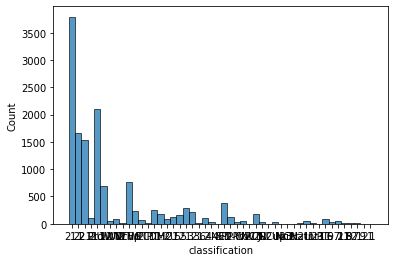

In [123]:
import seaborn as sns
sns.histplot(data=stages_df, x="classification")

In [131]:
stages_df[['classification']].plot.hist(bins=12, alpha=0.5).show()

TypeError: no numeric data to plot

Traceback (most recent call last):
  File "_pydevd_bundle\pydevd_cython_win32_39_64.pyx", line 1034, in _pydevd_bundle.pydevd_cython_win32_39_64.PyDBFrame.trace_dispatch
  File "C:\Program Files\JetBrains\PyCharm 2021.2.3\plugins\python\helpers-pro\jupyter_debug\pydev_jupyter_plugin.py", line 144, in cmd_step_over
    if _is_inside_jupyter_cell(frame, pydb):
  File "C:\Program Files\JetBrains\PyCharm 2021.2.3\plugins\python\helpers-pro\jupyter_debug\pydev_jupyter_plugin.py", line 209, in _is_inside_jupyter_cell
    if is_cell_filename(filename):
  File "C:\Program Files\JetBrains\PyCharm 2021.2.3\plugins\python\helpers-pro\jupyter_debug\pydev_jupyter_plugin.py", line 220, in is_cell_filename
    ipython_shell = get_ipython()
NameError: name 'get_ipython' is not defined


In [5]:
for col in stages_df.columns:
    for i,r in stages_df.iterrows():
        if isinstance(r[col],str):
            if r[col] != r[col].replace(',',''):
                print(r[col])
            stages_df.at[i,col]=r[col].replace(',','')

NameError: name 'test' is not defined

In [ ]:
stages_df.to_csv(CSV_PATHS['stages'],index=False,header=True)

In [14]:
from utils import *

stages_df = get_df('stages')
stages_df['stage_number'] = None
stage_name_pred = ~stages_df['stage_name'].isna() & (stages_df['stage_name'].str.contains('Stage'))
stages_df.loc[stage_name_pred]['stage_name'].apply(lambda x: x.split()[1] if len(x)>1 else None)

0        1
1        2
2        3
3        4
4        5
        ..
14248    9
14249    1
14250    2
14251    3
14252    4
Name: stage_name, Length: 10274, dtype: object

In [15]:
stages_df.loc[stage_name_pred,'stage_number'] = stages_df.loc[stage_name_pred]['stage_name'].apply(lambda x: x.split()[1] if len(x)>1 else None)

In [16]:

stages_df.to_csv('./data/stages_fixed.csv',index=False,header=True)


In [3]:

from utils import *

stages_df = get_df('stages')
stages_df

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4589-4590: invalid continuation byte

In [9]:
import pandas as pd
stages_df = pd.read_csv('data/stages.csv',encoding='latin_1')

C:\Users\User\PycharmProjects\velodrome-backend\venv\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
stages_df['year'] = pd.to_datetime(stages_df['race_date']).apply(lambda x:x.year)

In [17]:

len(stages_df[(stages_df['year']>2019) & stages_df['classification'].isin(RACE_CLASSES_TO_INCLUDE)]['race_id'].unique())

511

In [26]:
from utils import *
import pandas as pd
import re

stages_df = get_df('stages')
stages_df['race_date'] = pd.to_datetime(stages_df['race_date'])
stages_df['stage_date'] = pd.to_datetime(stages_df['stage_date'])

C:\Users\User\PycharmProjects\velodrome-backend\venv\lib\site-packages\IPython\core\interactiveshell.py:3377: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [25]:
for i,r in stages_df.iterrows():
    race_date = r['race_date']
    stage_date = r['stage_date']

    if str(race_date.year) not in r['race_link']:
        # year = r['race_link'].split('/')[-1]
        year_list = re.findall('(\d{4})', r['race_link'])
        if len(year_list)>0:
            if len(year_list)>1:
                print(year_list)
                continue
            year=year_list[0]
            stages_df.loc[i,'race_date'] = race_date.replace(year=int(year))
            stages_df.loc[i,'stage_date'] = stage_date.replace(year=int(year))
            print(f"{year} {race_date.year} {r['race_link']}")
            print(i)
        # print(f"{year} {race_date.year} {r['race_link']}")
        # if f"19{str(race_date.year)[2:]}" not in r['race_link']:

In [22]:

# stages_df.to_csv('data/stages.csv',header=True,index=False)

In [23]:
stages_df.index

RangeIndex(start=0, stop=28353, step=1)

In [27]:
stages_df[stages_df['distance'].isna()]

,stage_id,race_id,race_name,race_date,stage_date,stage_name,stage_number,stage_type,classification,nation,...,temp_avg,temp_max,temp_min,_1000_to_1500_m,_1500_to_2000_m,_2000_to_2500_m,_2500_to_3000_m,_3000_to_3500_m,race_total_distance,race_total_elevation_gain
4,5,1,New Zealand Cycle Classic,2022-05-01,2022-09-01,Stage 5,5.0,Stage,2.2,nz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,274,83,Santos Women's Tour,2016-01-16,2016-01-19,Stage 4,4.0,Stage,2.2,au,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584,585,148,Tour of Wellington,2009-01-21,2009-01-25,Stage 7,7.0,Stage,2.2,nz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
692,693,173,La Tropicale Amissa Bongo,2007-01-16,2007-01-16,Prologue,1.0,Prologue,2.2,ga,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,773,190,Grand Prix of Sharm el-Sheikh,2007-02-16,2007-02-16,One day race,NaN,One day race,1.2,eg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28313,28445,18573,National Championships Russia WU23 - Road Race\t,2021-08-17,2021-08-17,One day race,NaN,One day race,NC,ru,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28314,28446,18574,National Championships Serbia WU23 - ITT,2021-06-18,2021-06-18,Time trial,NaN,Time trial,NC,rs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28315,28447,18575,National Championships Singapore WU23 - ITT,2021-07-25,2021-07-25,Time trial,NaN,Time trial,NC,sg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28316,28448,18576,National Championships Venezuela WU23 - ITT,2021-06-18,2021-06-18,Time trial,NaN,Time trial,NC,ve,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
'-'.split()

['-']

In [1]:
from utils import *
import pandas as pd
import re

stages_df_cpy = pd.read_csv('data/stages - Copy.csv')
len(stages_df_cpy)

C:\Users\User\PycharmProjects\velodrome-backend\venv\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


28353

In [2]:
from utils import *
import pandas as pd
import re

stages_df = get_df('stages')

In [3]:
len(set(stages_df_cpy['stage_id']) - set(stages_df['stage_id']))


20460

In [6]:
stages_diff = set(stages_df_cpy['stage_id']) - set(stages_df['stage_id'])
df = stages_df_cpy[stages_df_cpy['stage_id'].isin(stages_diff)]
df.to_csv('data/stages.csv', mode='a', header=False, index=False)

In [ ]:
stages_df['start_time']=None
stages_df['avg_speed_winner']=None
stages_df['race_name']=None
stages_df['pcs_city_finish']=None
stages_df['pcs_city_start']=None
stages_df.head()

In [25]:
stages_df.to_csv('data/stages.csv',header=True,index=False)

In [1]:
stages_df.columns

NameError: name 'stages_df' is not defined

In [11]:

stages_df[~stages_df['elevation_gain'].isna()].sort_values('race_date')['elevation_gain']

Series([], Name: elevation_gain, dtype: float64)

In [13]:
#keep only empty rows
stages_df = get_df('stages')
stages_df_full=stages_df[~stages_df['race_name'].isna()]
if os.path.exists('data/stages_full.csv'):
    stages_df_full.to_csv('data/stages_full.csv',mode='a', header=False, index=False)
else:
    stages_df_full.to_csv('data/stages_full.csv', header=True, index=False)

In [14]:
stages_df_empty=stages_df[stages_df['race_name'].isna()]
stages_df_empty.to_csv('data/stages.csv', header=True, index=False)

In [17]:
stages_df = get_df('stages')
stages_df[stages_df['race_name'].isna()]

,stage_id,race_id,race_name,race_date,stage_date,stage_name,stage_number,stage_type,classification,nation,...,temp_min,_1000_to_1500_m,_1500_to_2000_m,_2000_to_2500_m,_2500_to_3000_m,_3000_to_3500_m,race_total_distance,race_total_elevation_gain,start_time,avg_speed_winner
0,188,55,NaN,24-01-18,24-01-18,Stage 1 (ITT),1.0,Individual Time Trial,2.1,ae,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,189,55,NaN,24-01-18,25-01-18,Stage 2,2.0,Stage,2.1,ae,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,190,55,NaN,24-01-18,26-01-18,Stage 3,3.0,Stage,2.1,ae,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,191,55,NaN,24-01-18,27-01-18,Stage 4,4.0,Stage,2.1,ae,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,772,189,NaN,15-02-07,15-02-07,One day race,NaN,One day race,1.1,es,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,976,261,NaN,07-04-07,07-04-07,One day race,NaN,One day race,1.1,nl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1074,289,NaN,10-02-05,10-02-05,One day race,NaN,One day race,1.1,es,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1218,325,NaN,05-02-04,05-02-04,One day race,NaN,One day race,1.3,es,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1295,343,NaN,06-02-03,06-02-03,One day race,NaN,One day race,1.3,es,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1338,355,NaN,06-02-02,06-02-02,One day race,NaN,One day race,1.3,es,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
from StageExtractor import StageExtractor
import pandas as pd
from utils import *
import traceback

stages_df = get_df('stages')
stages_df2=stages_df[stages_df['race_name'].isna()]
overwrite=True
counter=0
extractor = StageExtractor(id='notebook')
for i,r in stages_df2.iterrows():
    try:
        if counter>2000:
            break
        counter+=1
        stage = r.to_dict()
        race_link = r['race_link']
        race_page = extractor.browser.get(race_link).soup
        msg = f'race {race_link}'
        log(msg, 'INFO', id=extractor.id)
        stage['race_name'] = race_page.find('h1').text
        stage_type = StageExtractor.get_stage_type(race_page.find('span', attrs={'class': 'blue'}).text)
        stage['stage_date'] = datetime.now()
        stage['race_date'] = datetime.now()

        if (stage_type is None) or (stage_type == ''):
            log(f'Trying to fetch stage with no type, link {race_link}', 'WARNING', id=extractor.id)
            if any([('Stage' in o.text) for o in race_page.find_all('option')]):
                extractor.stages_handler(race_page, stage, overwrite)
            else:
                extractor.non_stage_handler(race_page, stage, overwrite)
            continue
        elif stage_type not in STAGES_TYPES:
            raise ValueError(f'Failed to parse race {race_link}, unfamiliar type {stage_type}')
        if stage_type in ["One day race", "Time trial"]:
            extractor.non_stage_handler(race_page, stage, overwrite)
        else:
            extractor.stages_handler(race_page, stage, overwrite)
    except:
        print(race_page.find('h1').text)
        log('ERROR: main loop','ERROR',id=extractor.id)

INFO	2022-04-20 15:29:44	race https://www.procyclingstats.com/race/tour-of-wellington/2022
race_date 2022-04-20 15:29:06.573093 != 2022-04-20 15:29:44.075417
stage_date 2022-01-05 00:00:00 != 2022-01-05 00:00:00
stage_number 1.0 != 1
elevation_loss nan != nan
elevation_average nan != nan
elevation_maximum nan != nan
elevation_minimum nan != nan
temp_avg nan != nan
temp_max nan != nan
temp_min nan != nan
_1000_to_1500_m nan != nan
_1500_to_2000_m nan != nan
_2000_to_2500_m nan != nan
_2500_to_3000_m nan != nan
_3000_to_3500_m nan != nan
race_total_distance nan != nan
race_total_elevation_gain nan != nan
race_date 2022-04-20 15:29:01.130477 != 2022-04-20 15:29:44.075417
stage_date 2022-01-06 00:00:00 != 2022-01-06 00:00:00
stage_number 2.0 != 2
elevation_loss nan != nan
elevation_average nan != nan
elevation_maximum nan != nan
elevation_minimum nan != nan
temp_avg nan != nan
temp_max nan != nan
temp_min nan != nan
_1000_to_1500_m nan != nan
_1500_to_2000_m nan != nan
_2000_to_2500_m nan 

KeyboardInterrupt: 

In [40]:
stages_df_full= pd.read_csv('data/stages_full.csv')
stages_df_full = stages_df_full.drop_duplicates()
stages_df_full.to_csv('data/stages_full.csv', header=True, index=False)

In [28]:
len(set(stages_df_cpy['stage_id'])-set(stages_df_full['stage_id']))

stages_df_full.to_csv('data/stages.csv', mode='a',header=False, index=False)

In [43]:
stages_df = get_df('stages')
stages_df[stages_df.duplicated()]

,stage_id,race_id,race_name,race_date,stage_date,stage_name,stage_number,stage_type,classification,nation,...,temp_min,_1000_to_1500_m,_1500_to_2000_m,_2000_to_2500_m,_2500_to_3000_m,_3000_to_3500_m,race_total_distance,race_total_elevation_gain,start_time,avg_speed_winner


In [30]:
len(stages_df['stage_id'].unique())

7895

In [32]:
len(stages_df)

7934

In [53]:
dup_df = stages_df.groupby('stage_id').filter(lambda x: len(x) > 1)





In [55]:
stages_df = get_df('stages')
for s in stages_df_cpy['stage_id'].unique():
    if s in stages_df['stage_id']:
        row = stages_df[stages_df['stage_id']==s]
        row2= stages_df_cpy[stages_df_cpy['stage_id']==s]
        if len(row)>0:
            print('problem')
        else:
            for c in row.columns:
                if (str(row.iloc[0][c])=='nan') and (str(row2.iloc[0][c])=='nan'):
                    continue
                if row.iloc[0][c]!=row2.iloc[0][c]:
                    print(s,f"{row.iloc[0][c]}!={row2.iloc[0][c]}")

IndexError: single positional indexer is out-of-bounds

In [ ]:
stages_df = get_df('stages')
stages_df[['stage_id','race_name','']]